In [2]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

In [3]:
import re
import pandas as pd

# 示例数据
methods_data = {
    'PINN': """
    [0.0005087824446602335, 0.0005036982323358009, 0.00047354163175130455, 0.0005109090994232514, 0.0025133012735287143, 0.0005096492208344824, 0.0005118634486876665, 0.000497159143258242, 0.0004636831048352414, 0.0005134697266146318]
    Error u of fuhe active learning(LHS sampling): 7.006057e-04
    [0.00016391117885265842, 0.00015913014953485472, 0.0001504946842919792, 0.00016413140740300307, 0.0007205999421506946, 0.0001641900967700232, 0.00016433861471347442, 0.00015656757147057942, 0.00014376447100805214, 0.0001649261415975202]
    MAE of fuhe active learning(LHS sampling): 2.152054e-04
    [5.4259837510531125e-08, 5.27324456669641e-08, 4.691583610257447e-08, 5.472507932524963e-08, 1.2905490326369088e-06, 5.4365116545731755e-08, 5.487377146231632e-08, 5.138499301105192e-08, 4.467702128486003e-08, 5.516772867976668e-08]
    MSE of fuhe active learning(LHS sampling): 1.759651e-07
    [0.00013387579, 0.0012302267, 8.3610794e-05, 3.242038e-05, 0.000160467, 9.607738e-05, 7.729792e-05, 0.0001328497, 0.00016965758, 0.0025165547]
    Chaos of fuhe active learning(LHS sampling): 4.633038e-04
    [4.2249349e-07, 5.2686187e-07, 5.6343106e-07, 4.638839e-07, 5.0442986e-07, 3.8193525e-07, 5.5111263e-07, 4.5302045e-07, 4.067042e-07, 3.9894917e-07]
    Residual of fuhe active learning(LHS sampling): 4.672822e-07
    """,
    'Xianxing': """
    [0.00048273163152131313, 0.0005089276620306528, 0.0005198831678445784, 0.0003101502852292616, 0.0005033078780783405, 0.000512027090808387, 0.0004536918349957246, 0.00043686474330410324, 0.0004983841255968636, 0.0004910332275793539]
    Error u of fuhe active learning(LHS sampling): 4.717002e-04
    [0.0001554566385424452, 0.00016255204425684672, 0.00016907877114856853, 0.00011238546203693523, 0.00016040777732079676, 0.00016418905595078672, 0.00014383053581932512, 0.0001381611023732485, 0.00015816444422158736, 0.0001581342458082211]
    MAE of fuhe active learning(LHS sampling): 1.522360e-04
    [4.9108795726354864e-08, 5.4066809161524537e-08, 5.696169385836477e-08, 2.4949086645192194e-08, 5.290882894814274e-08, 5.475991485545602e-08, 4.3171718795248384e-08, 3.9984048655200166e-08, 5.185393943978126e-08, 5.0630850175090733e-08]
    MSE of fuhe active learning(LHS sampling): 4.783957e-08
    [9.0635025e-05, 0.009086326, 7.201742e-05, 3.5906352e-05, 0.00017867956, 9.896849e-05, 0.00010152116, 0.00015847705, 0.00015333033, 0.0013764151]
    Chaos of fuhe active learning(LHS sampling): 1.135228e-03
    [4.7466165e-07, 4.7185517e-07, 4.6677837e-07, 4.4436274e-07, 4.805479e-07, 4.4654257e-07, 4.2771717e-07, 4.014164e-07, 4.705007e-07, 4.8656693e-07]
    Residual of fuhe active learning(LHS sampling): 4.570950e-07
    """,
    'Active': """
    [0.000608666913740094, 0.0005060617040624819, 0.0004565058180735905, 0.0005043343419629205, 0.0005977717666506546, 0.0005397840895237612, 0.0005973051784124295, 0.0005525252890304684, 0.0007442194216598615, 0.000611255712575756]
    Error u of fuhe active learning(LHS sampling): 5.718430e-04
    [0.0002113452401365624, 0.00016022485246939655, 0.0001425543445535236, 0.0001631166959953244, 0.00020814859397692075, 0.0001786324104916076, 0.00020367793425580855, 0.00018396739159334789, 0.0002631555442342014, 0.00021359350891611532]
    MAE of fuhe active learning(LHS sampling): 1.928417e-04
    [8.223211980068802e-08, 5.301102165396955e-08, 4.425798367178048e-08, 5.331070845734451e-08, 7.899558964107687e-08, 6.202945420988179e-08, 7.760311425492723e-08, 6.500654750771102e-08, 1.268238431552237e-07, 8.315198817472114e-08]
    MSE of fuhe active learning(LHS sampling): 7.264224e-08
    [0.032003112, 8.051978e-05, 8.2503946e-05, 7.883138e-05, 0.0001733739, 8.336529e-05, 0.15200068, 0.00015996647, 0.0055083837, 0.00011374748]
    Chaos of fuhe active learning(LHS sampling): 1.902845e-02
    [4.629319e-07, 4.4575881e-07, 4.889971e-07, 5.1658617e-07, 4.8320135e-07, 4.4308968e-07, 4.5881347e-07, 5.180507e-07, 4.792828e-07, 4.06656e-07]
    Residual of fuhe active learning(LHS sampling): 4.703368e-07
    """,
    'Residual': """
    [0.00047764733279194693, 0.00048761622354458184, 0.00040407430482806056, 0.000478382897761557, 0.00046572685991431577, 0.0004627513097383284, 0.00047127400291657176, 0.0004655030405480679, 0.00044911519568708176, 0.0004914303022777929]
    Error u of fuhe active learning(LHS sampling): 4.653521e-04
    [0.00014657673315353358, 0.00014864939554963473, 0.0001270863161506696, 0.0001474071082419413, 0.0001425763706010133, 0.00014284283962355234, 0.00014415372672689947, 0.00014241721247166587, 0.00013986521201784217, 0.0001486440291463075]
    MAE of fuhe active learning(LHS sampling): 1.430219e-04
    [4.7921945307583216e-08, 4.930351139834182e-08, 3.540487588505494e-08, 4.7243580206558554e-08, 4.506089672832849e-08, 4.493501305881224e-08, 4.643537099820985e-08, 4.517939136164342e-08, 4.232987364116755e-08, 5.008452961993858e-08]
    MSE of fuhe active learning(LHS sampling): 4.538990e-08
    [0.0013486225, 0.00010007538, 0.00015723109, 0.029648455, 9.4376424e-05, 0.0001224641, 0.00010498802, 2.5136904e-05, 0.0035482075, 0.00017247524]
    Chaos of fuhe active learning(LHS sampling): 3.532203e-03
    [3.8290364e-07, 4.6095215e-07, 4.5175966e-07, 4.049307e-07, 4.9617324e-07, 3.7301152e-07, 4.67071e-07, 4.5581373e-07, 4.7911726e-07, 5.272243e-07]
    Residual of fuhe active learning(LHS sampling): 4.498957e-07
    """,
    'Fuhe': """
    [0.0004961103072333248, 0.00046619750453440645, 0.00044812994054817425, 0.00045496907788401787, 0.0004513845325750538, 0.0004558674997035522, 0.00046678459578557266, 0.0004525650254789307, 0.00046874762314118545, 0.00045332242312937755]
    Error u of fuhe active learning(LHS sampling): 4.614079e-04
    [0.00016970347599325975, 0.0001399383645091951, 0.00013781297423044056, 0.00013970093909752764, 0.00013902958034841834, 0.00013869683107313054, 0.00014214837803255186, 0.00013960507956494006, 0.0001456397286521445, 0.00013969511166029872]
    MAE of fuhe active learning(LHS sampling): 1.431970e-04
    [6.203581068937717e-08, 4.527632123083983e-08, 4.214798025891287e-08, 4.367475786156808e-08, 4.265338424267042e-08, 4.3480492701146856e-08, 4.528056672785499e-08, 4.2793838545444246e-08, 4.5639815561755474e-08, 4.313532590908815e-08]
    MSE of fuhe active learning(LHS sampling): 4.561183e-08
    [0.003492971, 0.034836244, 8.884817e-05, 7.809353e-06, 0.0024442598, 0.00012461333, 0.00010308255, 0.0106321955, 8.350033e-05, 0.015158418]
    Chaos of fuhe active learning(LHS sampling): 6.697194e-03
    [5.2104224e-07, 4.951812e-07, 4.2712873e-07, 4.6896048e-07, 4.3156956e-07, 4.4490844e-07, 4.4388298e-07, 4.6769492e-07, 4.5043407e-07, 4.001638e-07]
    Residual of fuhe active learning(LHS sampling): 4.550966e-07
    """,
    'Chaos': """
    [0.00042642490089755925, 0.0004887765001760647, 0.0005595207912084901, 0.00041667678480706086, 0.0006117964676777106, 0.0005405036548020286, 0.0009531861917304745, 0.000456322438933732, 0.0004329031764894378, 0.0005413048931054902]
    Error u of fuhe active learning(LHS sampling): 5.427416e-04
    [0.00013634100615611148, 0.00016145864567439512, 0.00018918143744980792, 0.0001307193623444829, 0.00021196426615017422, 0.00017692733189857488, 0.0002577473698377363, 0.00015398766734016147, 0.00013067650017626004, 0.00018075406374743868]
    MAE of fuhe active learning(LHS sampling): 1.729758e-04
    [3.850883778399072e-08, 5.1108211081099866e-08, 6.757244091208113e-08, 3.655937109462945e-08, 8.261631968060345e-08, 6.143249362142831e-08, 1.8496407216023882e-07, 4.419291510180564e-08, 3.891473792220542e-08, 6.245264737318887e-08]
    MSE of fuhe active learning(LHS sampling): 6.683220e-08
    [0.004131102, 0.010490901, 0.0001228182, 5.7031866e-05, 2.8340884e-05, 8.062559e-05, 9.9044395e-05, 0.040431168, 0.0017420182, 0.030670192]
    Chaos of fuhe active learning(LHS sampling): 8.785324e-03
    [5.1081406e-07, 4.3552882e-07, 5.0019753e-07, 4.3993873e-07, 3.798266e-07, 4.244166e-07, 4.0025316e-07, 4.2328247e-07, 4.893743e-07, 4.3322757e-07]
    Residual of fuhe active learning(LHS sampling): 4.436860e-07
    """,
    '0.9Residual': """
    [0.00045645757165297686, 0.0004899227888558283, 0.000498724128794854, 0.00044184814658946854, 0.00043028802217618127, 0.0004722634737138111, 0.0004828389339245508, 0.0004499461548467816, 0.00045116375881377546, 0.00047037720180895026]
    Error u of fuhe active learning(LHS sampling): 4.643830e-04
    [0.00014113277544078515, 0.00014817587986217095, 0.000155693708290165, 0.000139448718682918, 0.00013419655924408306, 0.00014417427949696372, 0.00014640735102026563, 0.00013794067245859429, 0.00014066529953426569, 0.00014368331640393417]
    MAE of fuhe active learning(LHS sampling): 1.431519e-04
    [4.480210291492866e-08, 4.953079855439406e-08, 5.272715872861646e-08, 4.114016981507913e-08, 3.9236385573228444e-08, 4.673982787566019e-08, 4.799849210852784e-08, 4.239130583537543e-08, 4.2646565492748654e-08, 4.6178217172568694e-08]
    MSE of fuhe active learning(LHS sampling): 4.533910e-08
    [0.00028801584, 0.0003390554, 0.00016269245, 0.040469177, 0.000115625786, 0.0001321127, 9.23185e-05, 3.3145316e-05, 0.004113967, 0.00017051263]
    Chaos of fuhe active learning(LHS sampling): 4.591662e-03
    [4.505007e-07, 4.1535918e-07, 4.2653028e-07, 4.5799698e-07, 4.128649e-07, 4.1198268e-07, 4.555618e-07, 4.9106893e-07, 4.4536364e-07, 4.8047855e-07]
    Residual of fuhe active learning(LHS sampling): 4.447708e-07
    """,
    '0.8Residual': """
    [0.0004471737145144941, 0.00048031767185492214, 0.0004390774189688743, 0.00044906104483604905, 0.0004732383739422827, 0.0004802584136618407, 0.0005027223942574585, 0.0004490452729254422, 0.0004536135554518801, 0.0004723102710520015]
    Error u of fuhe active learning(LHS sampling): 4.646818e-04
    [0.00013924146395148624, 0.00014482977455586567, 0.00013904485111080673, 0.0001395696433206969, 0.00014632501641656816, 0.00014877158220927443, 0.00015289333500606486, 0.0001374643080251733, 0.00014215648965612738, 0.000143889220536663]
    MAE of fuhe active learning(LHS sampling): 1.434186e-04
    [4.143540767250469e-08, 4.761388785120896e-08, 4.145741804610044e-08, 4.2140308996857794e-08, 4.7567839640961575e-08, 4.813482950763445e-08, 5.2225822083610765e-08, 4.2117079110040334e-08, 4.3361126661457016e-08, 4.6513548994439686e-08]
    MSE of fuhe active learning(LHS sampling): 4.525673e-08
    [0.0006657077, 0.0011622767, 0.00018172579, 0.055871855, 0.00010016945, 0.00013484896, 9.0603855e-05, 1.074538e-07, 0.003354489, 0.00016244128]
    Chaos of fuhe active learning(LHS sampling): 6.172423e-03
    [5.095535e-07, 4.5025058e-07, 4.6882542e-07, 4.523008e-07, 4.5732213e-07, 4.3694763e-07, 4.2881948e-07, 4.3272985e-07, 4.3017099e-07, 4.2880174e-07]
    Residual of fuhe active learning(LHS sampling): 4.495722e-07
    """,
    '0.7Residual': """
    [0.0004164300120883028, 0.0004699628521003135, 0.000462821093686286, 0.00046001477992488023, 0.0004660976946161597, 0.00047765929188316826, 0.00046358146420273275, 0.00045424732844180047, 0.0004384501060161691, 0.0004568539786534314]
    Error u of fuhe active learning(LHS sampling): 4.566119e-04
    [0.00013011585491287008, 0.00014131598825786298, 0.00014401903154403304, 0.00014547611466960567, 0.00014391376352463242, 0.00014656871315207382, 0.0001417844076777676, 0.00013920108192252972, 0.00013827284224325484, 0.0001403342399836691]
    MAE of fuhe active learning(LHS sampling): 1.411002e-04
    [3.63427911803267e-08, 4.5566222563446856e-08, 4.6556766266787634e-08, 4.4395366301253004e-08, 4.576368254929357e-08, 4.7319297732488186e-08, 4.4888381069380684e-08, 4.3124718821182355e-08, 4.0864598455538435e-08, 4.380700734706599e-08]
    MSE of fuhe active learning(LHS sampling): 4.386288e-08
    [0.0009179331, 0.005221554, 0.00017900014, 0.072105065, 0.00010416837, 0.00015015657, 8.978776e-05, 1.0820728e-05, 0.0031606597, 0.00016888848]
    Chaos of fuhe active learning(LHS sampling): 8.210803e-03
    [5.4313523e-07, 4.883477e-07, 4.1022327e-07, 4.1597332e-07, 4.611868e-07, 3.924224e-07, 4.488079e-07, 4.2471015e-07, 4.8998436e-07, 5.28928e-07]
    Residual of fuhe active learning(LHS sampling): 4.603719e-07
    """,
    '0.6Residual': """
    [0.0004377055379520998, 0.0005101856138939466, 0.0004622401143584109, 0.000889516568249523, 0.0004158892855763638, 0.000465737146515632, 0.0004844190529196474, 0.00045422738060117566, 0.0004653132644447038, 0.00046854357742022104]
    Error u of fuhe active learning(LHS sampling): 5.053778e-04
    [0.00013630495663504314, 0.00015319456180995218, 0.0001430620713404468, 0.0002742893463116312, 0.00012999463376193435, 0.00014281662257980705, 0.00014754209565790666, 0.00013965181852010718, 0.00014339804350528364, 0.00014306673285142572]
    MAE of fuhe active learning(LHS sampling): 1.553321e-04
    [4.012086810977423e-08, 5.384132684025812e-08, 4.464090833585221e-08, 1.662659112463375e-07, 3.7056044518247446e-08, 4.54919331144758e-08, 4.853973532881597e-08, 4.326111012936027e-08, 4.596344966326435e-08, 4.573272035754108e-08]
    MSE of fuhe active learning(LHS sampling): 5.709140e-08
    [0.0007519618, 0.00022192646, 0.000155579, 0.033091445, 9.2475966e-05, 0.000115393006, 9.791822e-05, 1.4833988e-05, 0.0036775414, 0.0001625345]
    Chaos of fuhe active learning(LHS sampling): 3.838161e-03
    [4.5444676e-07, 4.447745e-07, 4.6844207e-07, 3.9869064e-07, 5.228367e-07, 4.8251104e-07, 4.048261e-07, 4.4110357e-07, 5.119464e-07, 4.7402705e-07]
    Residual of fuhe active learning(LHS sampling): 4.603605e-07
    """,
    '0.4Residual': """
    [0.00047732804417644864, 0.00046646447617935006, 0.0004446904983392181, 0.0003117474036349538, 0.0004651428298105604, 0.00045951923683062003, 0.0004560904937577952, 0.00043480486017570476, 0.000454883591049593, 0.0004655045833523351]
    Error u of fuhe active learning(LHS sampling): 4.436176e-04
    [0.0001531410254179794, 0.00013965318619740282, 0.00014019359523587282, 0.0001431785882238543, 0.0001452555551656729, 0.00014174354033720586, 0.0001403783470642015, 0.00013522503438398328, 0.0001382453501976774, 0.00014258665065984216]
    MAE of fuhe active learning(LHS sampling): 1.419601e-04
    [4.8044152423401766e-08, 4.499104892897345e-08, 4.227584824703265e-08, 3.6065813192725476e-08, 4.571149852940099e-08, 4.437504215068709e-08, 4.3668473694078404e-08, 3.995205039382538e-08, 4.4123779690177736e-08, 4.537849509022741e-08]
    MSE of fuhe active learning(LHS sampling): 4.345862e-08
    [0.0068149967, 0.00015540878, 0.00016883604, 0.016907992, 0.000104154606, 0.00012471847, 9.5748735e-05, 0.015310458, 0.00219521, 0.00015811711]
    Chaos of fuhe active learning(LHS sampling): 4.203564e-03
    [4.5175966e-07, 4.376907e-07, 4.3840282e-07, 4.092244e-07, 4.2827355e-07, 3.9346264e-07, 4.382232e-07, 4.2424858e-07, 4.937858e-07, 4.5243019e-07]
    Residual of fuhe active learning(LHS sampling): 4.367502e-07
    """,
    '0.3Residual': """
    [0.00046462072833480247, 0.00045459489260956445, 0.00046454526493767804, 0.0004900574189269606, 0.0004979641093238288, 0.00045495011433855764, 0.00045575095737346245, 0.0004639682579845943, 0.0004402172149710694, 0.00046412114247029485]
    Error u of fuhe active learning(LHS sampling): 4.650790e-04
    [0.0001439411317802124, 0.00013989488008387055, 0.00014441341730184507, 0.00016752095878229913, 0.00015089211362520402, 0.00013862087722265657, 0.00014114932525535856, 0.00014324236988916852, 0.00013551845581030993, 0.00014177172467033273]
    MAE of fuhe active learning(LHS sampling): 1.446965e-04
    [4.52398345742748e-08, 4.314352633683558e-08, 4.493873137310858e-08, 5.116230927686407e-08, 5.185288733374757e-08, 4.318346498522523e-08, 4.3636264024885635e-08, 4.498616020262568e-08, 4.1143361080066086e-08, 4.488750374314009e-08]
    MSE of fuhe active learning(LHS sampling): 4.541740e-08
    [0.00023949993, 0.006844519, 0.00016635557, 0.02460533, 7.445052e-05, 0.00012958476, 8.899878e-05, 0.01424332, 0.0024194787, 0.00016783958]
    Chaos of fuhe active learning(LHS sampling): 4.897938e-03
    [5.055185e-07, 3.8634107e-07, 4.069325e-07, 4.2912052e-07, 4.9176083e-07, 4.46669e-07, 4.433955e-07, 4.5586285e-07, 4.7497997e-07, 4.3979867e-07]
    Residual of fuhe active learning(LHS sampling): 4.480379e-07
    """,
    '0.2Residual': """
    [0.0004699155965956622, 0.00047132380787141175, 0.0007521993070233181, 0.0012912584269428812, 0.000466694186210962, 0.001646038614244138, 0.0004549873921297937, 0.0004635401359922551, 0.0004394747313454553, 0.0004620071169135639]
    Error u of fuhe active learning(LHS sampling): 6.917439e-04
    [0.00014512156704374126, 0.00014239587130704455, 0.0002291289050185329, 0.00036320199745173086, 0.00014096559037651114, 0.0004773027666512896, 0.00014023986599833054, 0.00014089373959696666, 0.00013186680685550617, 0.0001425014298894621]
    MAE of fuhe active learning(LHS sampling): 2.053619e-04
    [4.58960304148056e-08, 4.586664732344785e-08, 1.1762082031033463e-07, 3.386448554275021e-07, 4.5311877235943674e-08, 5.624506588627823e-07, 4.3464759755996697e-08, 4.479107629704792e-08, 4.075911045366115e-08, 4.458529565617529e-08]
    MSE of fuhe active learning(LHS sampling): 1.329391e-07
    [0.0002443057, 0.009946279, 0.00016339123, 0.018467627, 7.4798576e-05, 0.00013005271, 8.4170824e-05, 4.497655e-05, 0.0029183482, 0.00016879896]
    Chaos of fuhe active learning(LHS sampling): 3.224275e-03
    [5.063623e-07, 5.173488e-07, 4.157073e-07, 3.9195766e-07, 4.82461e-07, 4.110177e-07, 4.5690922e-07, 4.0747955e-07, 4.90357e-07, 4.2553484e-07]
    Residual of fuhe active learning(LHS sampling): 4.505135e-07
    """,
    '0.1Residual': """
    [0.0004560185035149923, 0.0004646558917392325, 0.0004659261431596377, 0.0004929231234293747, 0.00045745110899275107, 0.0004520138560389472, 0.00045527343087670147, 0.0004547612865912191, 0.0004790176290871009, 0.8407448953878035]
    Error u of fuhe active learning(LHS sampling): 8.449229e-02
    [0.0001412146070808538, 0.00014118135686067433, 0.0001434783765851759, 0.0001614263527324162, 0.00014141640938687832, 0.00014075827092457888, 0.00014462874584269349, 0.0001389976122352056, 0.0001433407984757558, 0.2177926814814815]
    MAE of fuhe active learning(LHS sampling): 2.190891e-02
    [4.358686505565294e-08, 4.508788879062447e-08, 4.521952453993014e-08, 5.116019911953608e-08, 4.389606375587172e-08, 4.299701562556498e-08, 4.409430555039591e-08, 4.317036141616779e-08, 4.774411797673201e-08, 0.14209816505950743]
    MSE of fuhe active learning(LHS sampling): 1.420986e-02
    [0.00093160826, 0.0036879445, 0.00017652367, 0.056928538, 8.6093394e-05, 8.833786e-05, 7.728774e-05, 5.7947724e-05, 0.0027140277, 4.3289623e-05]
    Chaos of fuhe active learning(LHS sampling): 6.479160e-03
    [4.3439945e-07, 4.781955e-07, 4.8527636e-07, 4.5851084e-07, 5.6924364e-07, 3.9500674e-07, 4.082808e-07, 4.2977354e-07, 5.093091e-07, 4.258565e-28]
    Residual of fuhe active learning(LHS sampling): 4.167996e-07
    """,

}

# 定义读取数据的函数
def extract_metrics(data):
    # 使用正则表达式提取数据
    error_u = re.findall(r'\[([^\]]+)\]', data)[0]
    mae = re.findall(r'\[([^\]]+)\]', data)[1]
    mse = re.findall(r'\[([^\]]+)\]', data)[2]
    chaos = re.findall(r'\[([^\]]+)\]', data)[3]
    residual = re.findall(r'\[([^\]]+)\]', data)[4]
    
    # 将字符串转换为浮点数列表
    error_u = list(map(float, error_u.split(',')))
    mae = list(map(float, mae.split(',')))
    mse = list(map(float, mse.split(',')))
    chaos = list(map(float, chaos.split(',')))
    residual = list(map(float, residual.split(',')))
    
    return error_u, mae, mse, chaos, residual

# 定义处理所有方法数据的函数
def process_methods_data(methods_data):
    data = {
        'Method': [],
        'Metric': [],
        'Values': []
    }
    
    for method, data_str in methods_data.items():
        error_u, mae, mse, chaos, residual = extract_metrics(data_str)
        
        data['Method'].append(method)
        data['Metric'].append('Error_u')
        data['Values'].append(error_u)
        
        data['Method'].append(method)
        data['Metric'].append('MAE')
        data['Values'].append(mae)
        
        data['Method'].append(method)
        data['Metric'].append('MSE')
        data['Values'].append(mse)

        data['Method'].append(method)
        data['Metric'].append('Chaos')
        data['Values'].append(chaos)

        data['Method'].append(method)
        data['Metric'].append('Residual')
        data['Values'].append(residual)
    
    return pd.DataFrame(data)

# 处理方法数据并生成 DataFrame
df = process_methods_data(methods_data)

# 打印 DataFrame
print(df)

         Method    Metric                                             Values
0          PINN   Error_u  [0.0005087824446602335, 0.0005036982323358009,...
1          PINN       MAE  [0.00016391117885265842, 0.0001591301495348547...
2          PINN       MSE  [5.4259837510531125e-08, 5.27324456669641e-08,...
3          PINN     Chaos  [0.00013387579, 0.0012302267, 8.3610794e-05, 3...
4          PINN  Residual  [4.2249349e-07, 5.2686187e-07, 5.6343106e-07, ...
..          ...       ...                                                ...
65  0.1Residual   Error_u  [0.0004560185035149923, 0.0004646558917392325,...
66  0.1Residual       MAE  [0.0001412146070808538, 0.00014118135686067433...
67  0.1Residual       MSE  [4.358686505565294e-08, 4.508788879062447e-08,...
68  0.1Residual     Chaos  [0.00093160826, 0.0036879445, 0.00017652367, 0...
69  0.1Residual  Residual  [4.3439945e-07, 4.781955e-07, 4.8527636e-07, 4...

[70 rows x 3 columns]


In [3]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "Error_u"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Xianxing', 'Active', 'Residual', 'Fuhe', 'Chaos', '0.9Residual', '0.8Residual', '0.7Residual', '0.6Residual', '0.4Residual', '0.3Residual', '0.2Residual', '0.1Residual']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.0005087824446602335, 0.0005036982323358009, 0.00047354163175130455, 0.0005109090994232514, 0.0025133012735287143, 0.0005096492208344824, 0.0005118634486876665, 0.000497159143258242, 0.0004636831048352414, 0.0005134697266146318], 'Xianxing': [0.00048273163152131313, 0.0005089276620306528, 0.0005198831678445784, 0.0003101502852292616, 0.0005033078780783405, 0.000512027090808387, 0.0004536918349957246, 0.00043686474330410324, 0.0004983841255968636, 0.0004910332275793539], 'Active': [0.000608666913740094, 0.0005060617040624819, 0.0004565058180735905, 0.0005043343419629205, 0.0005977717666506546, 0.0005397840895237612, 0.0005973051784124295, 0.0005525252890304684, 0.0007442194216598615, 0.000611255712575756], 'Residual': [0.00047764733279194693, 0.0004876162235

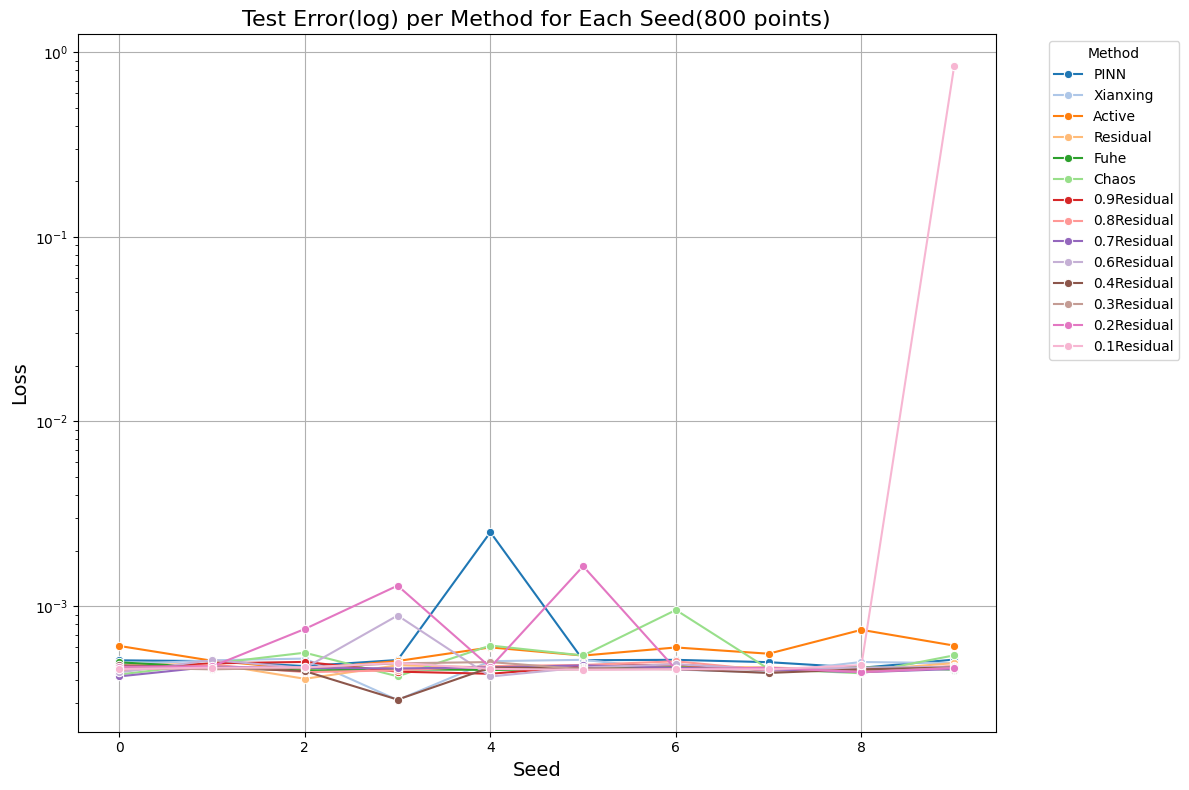

In [4]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')


# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签

plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

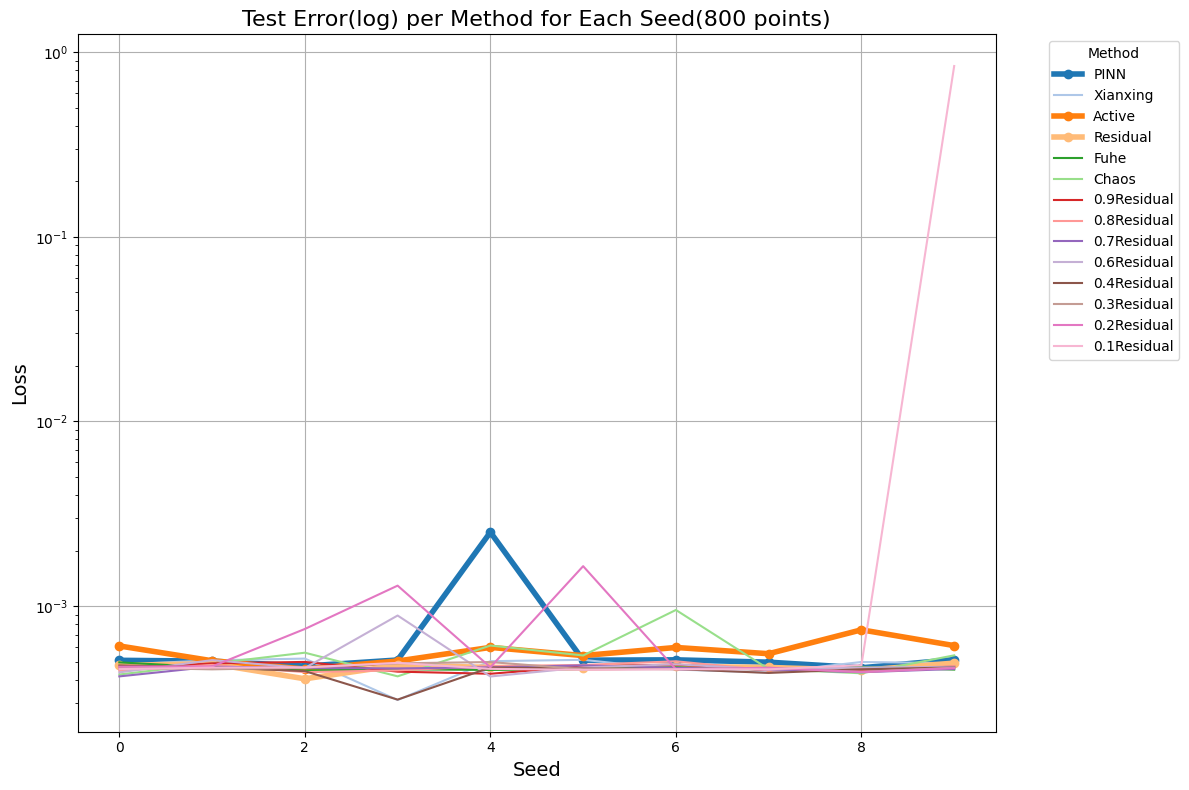

In [5]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )

# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_32596\772891821.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_32596\772891821.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


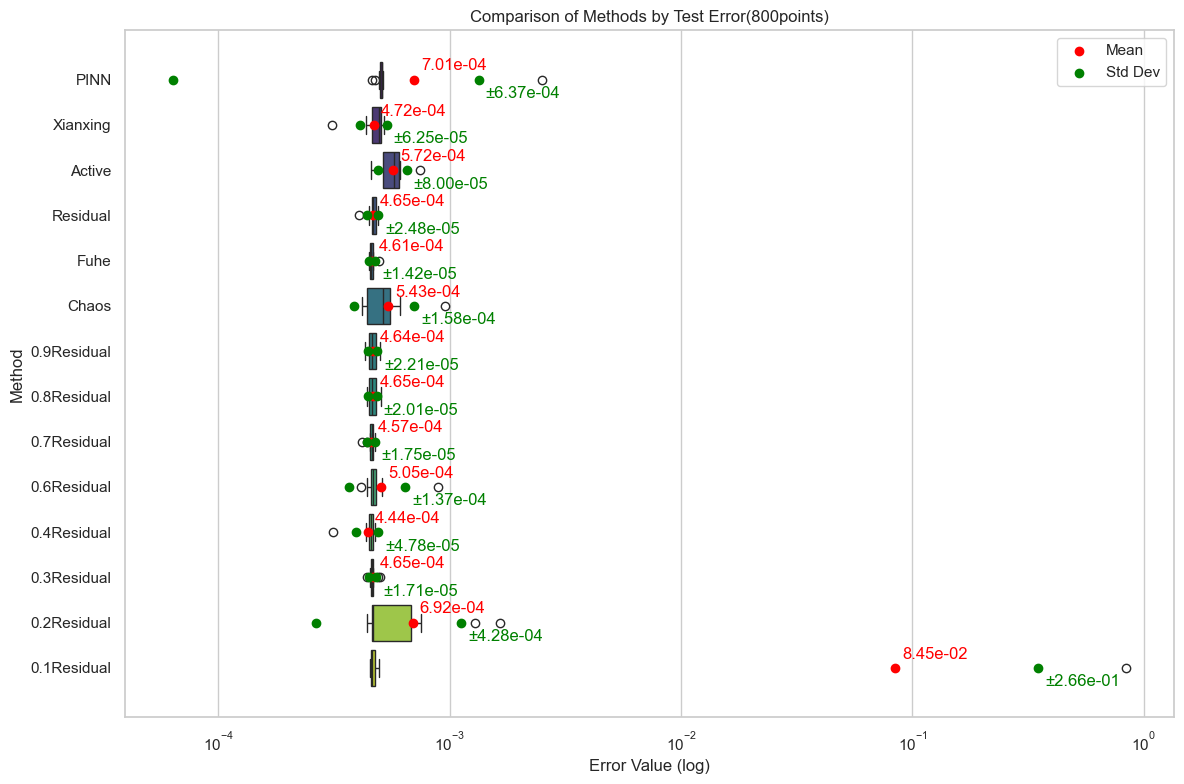

In [6]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.2e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.2e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

In [1]:
(4.44e-04-4.61e-04)/4.44e-04

-0.038288288288288244

C:\Users\cheny\AppData\Local\Temp\ipykernel_32596\2907399335.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_32596\2907399335.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


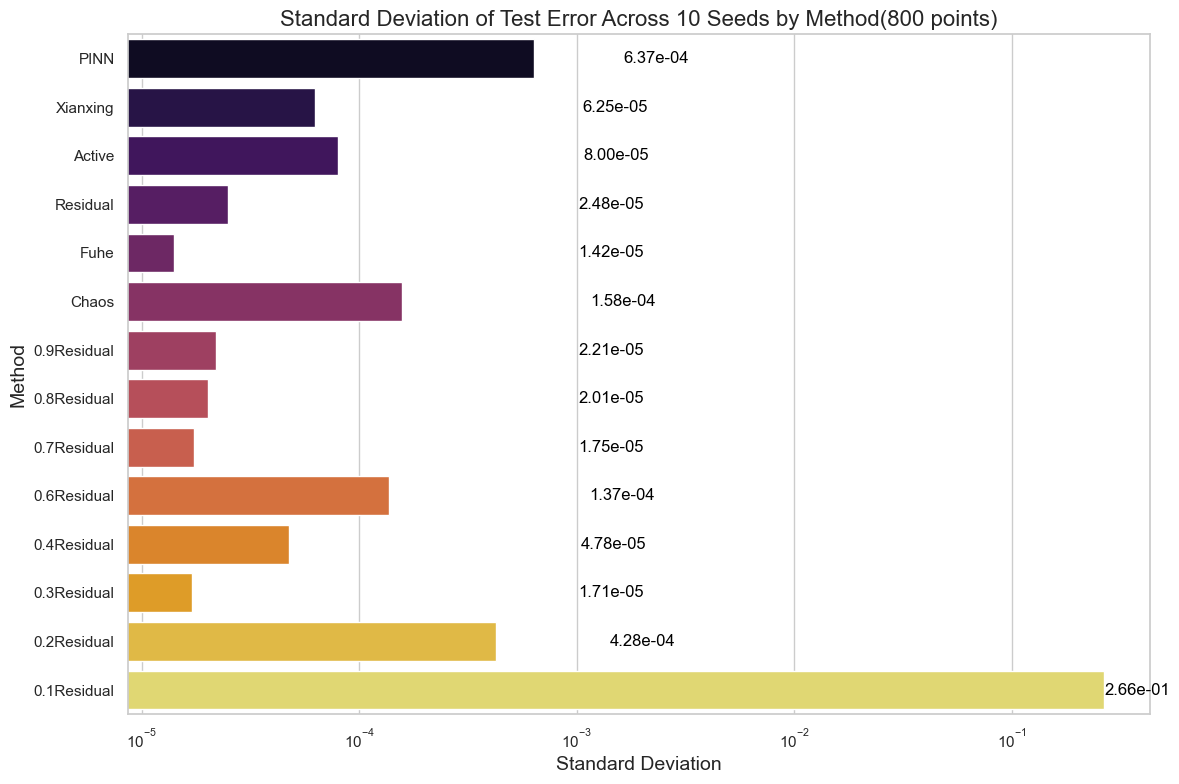

In [8]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of Test Error Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

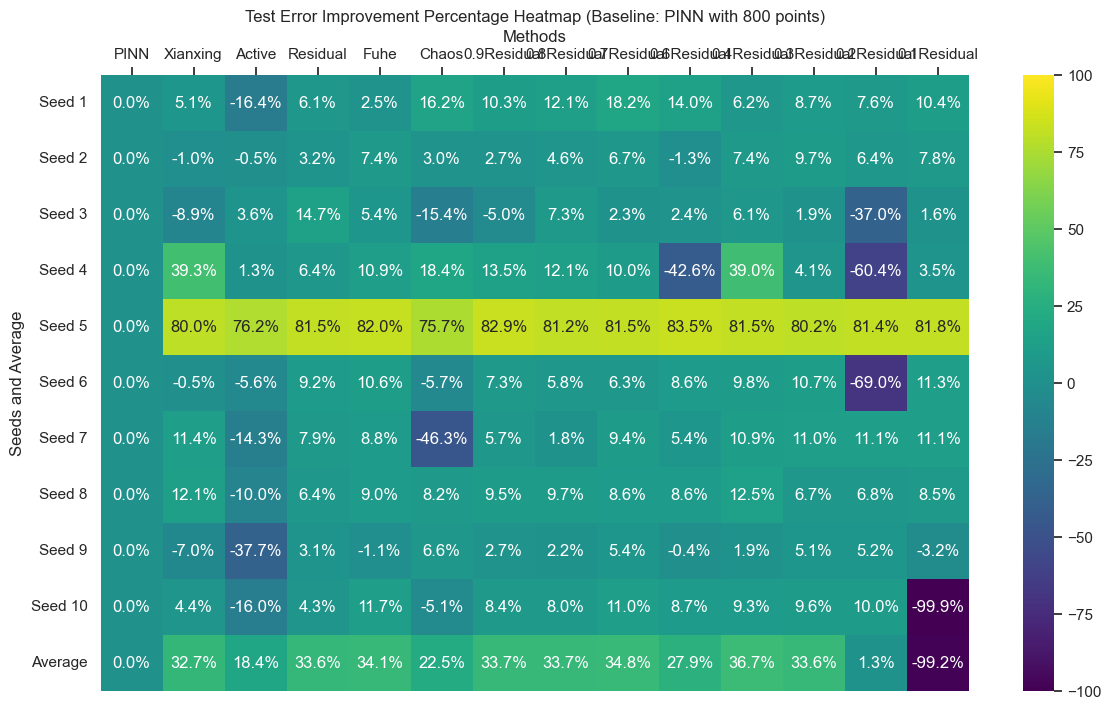

In [9]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



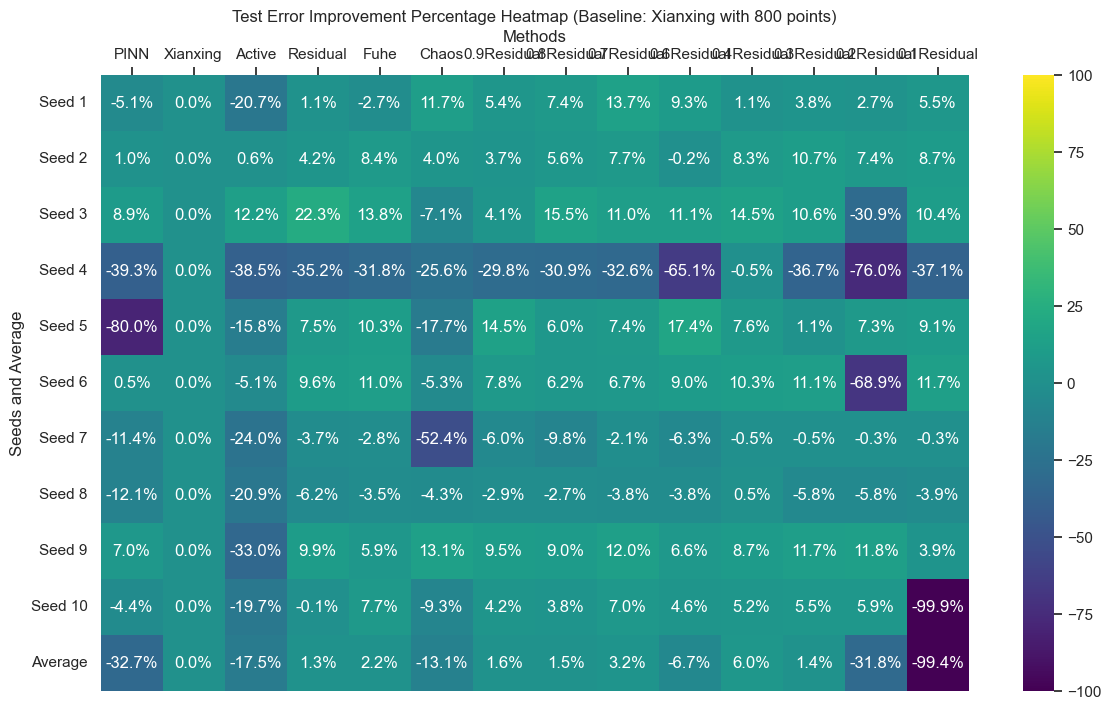

In [10]:
# 选择基准方法
baseline_method = 'Xianxing'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



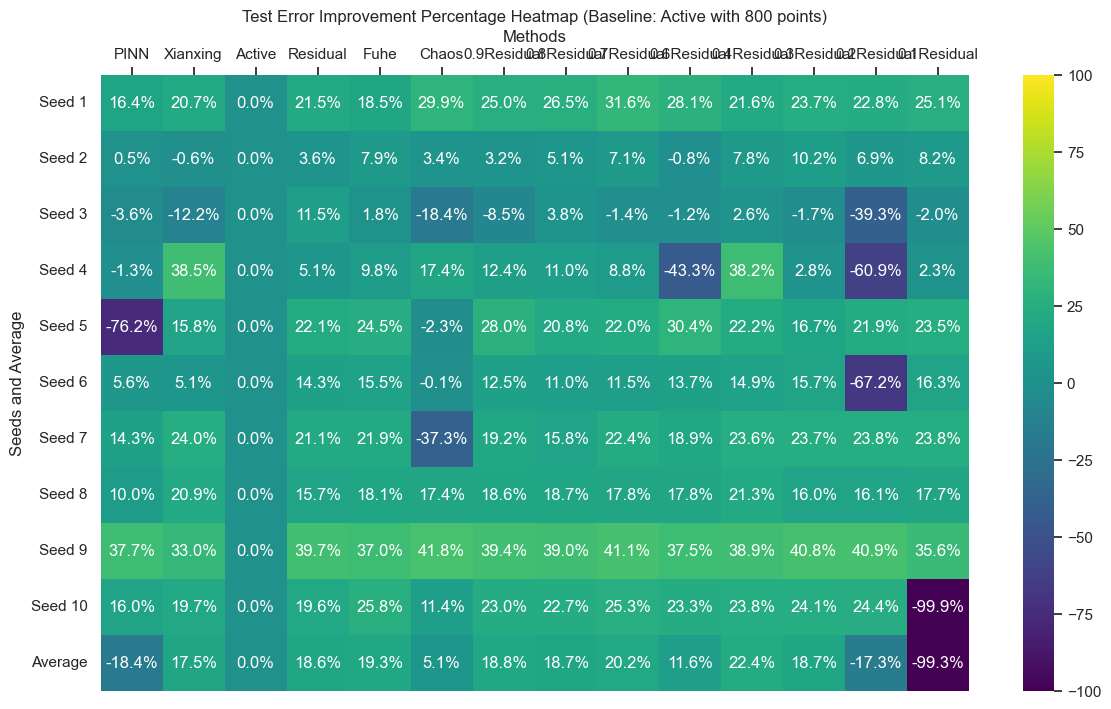

In [11]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



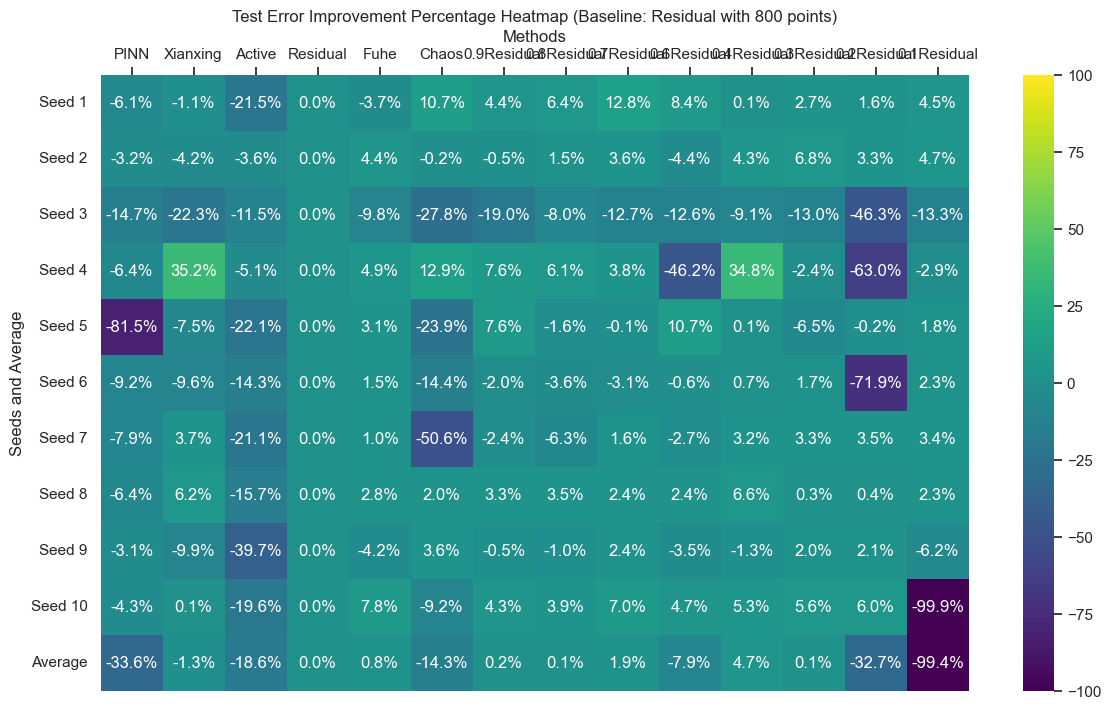

In [12]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



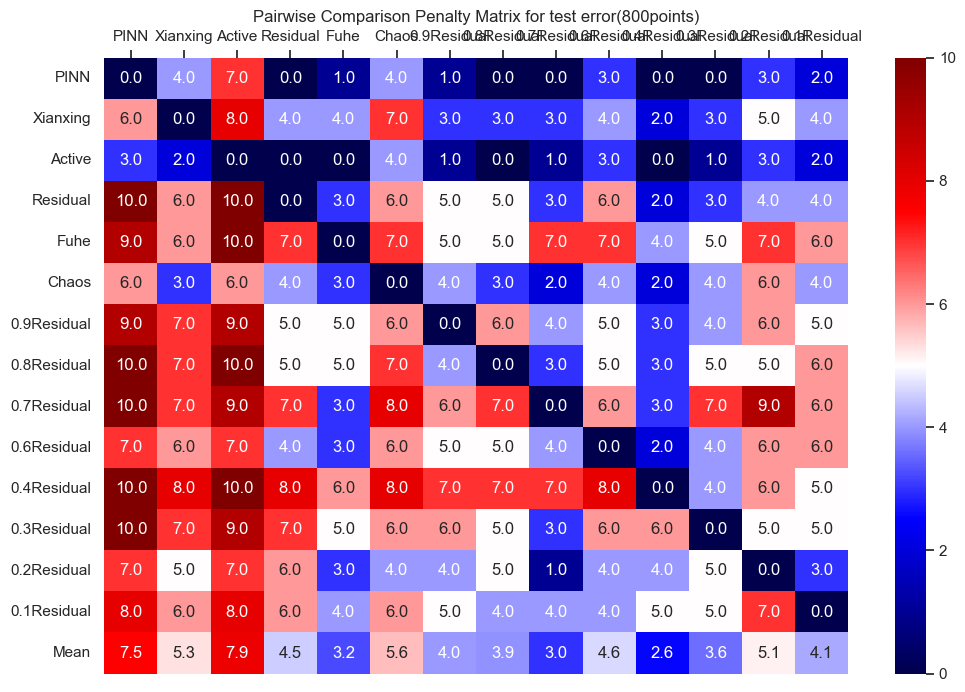

In [13]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for test error(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [14]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MAE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Xianxing', 'Active', 'Residual', 'Fuhe', 'Chaos', '0.9Residual', '0.8Residual', '0.7Residual', '0.6Residual', '0.4Residual', '0.3Residual', '0.2Residual', '0.1Residual']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.00016391117885265842, 0.00015913014953485472, 0.0001504946842919792, 0.00016413140740300307, 0.0007205999421506946, 0.0001641900967700232, 0.00016433861471347442, 0.00015656757147057942, 0.00014376447100805214, 0.0001649261415975202], 'Xianxing': [0.0001554566385424452, 0.00016255204425684672, 0.00016907877114856853, 0.00011238546203693523, 0.00016040777732079676, 0.00016418905595078672, 0.00014383053581932512, 0.0001381611023732485, 0.00015816444422158736, 0.0001581342458082211], 'Active': [0.0002113452401365624, 0.00016022485246939655, 0.0001425543445535236, 0.0001631166959953244, 0.00020814859397692075, 0.0001786324104916076, 0.00020367793425580855, 0.00018396739159334789, 0.0002631555442342014, 0.00021359350891611532], 'Residual': [0.000146576733153533

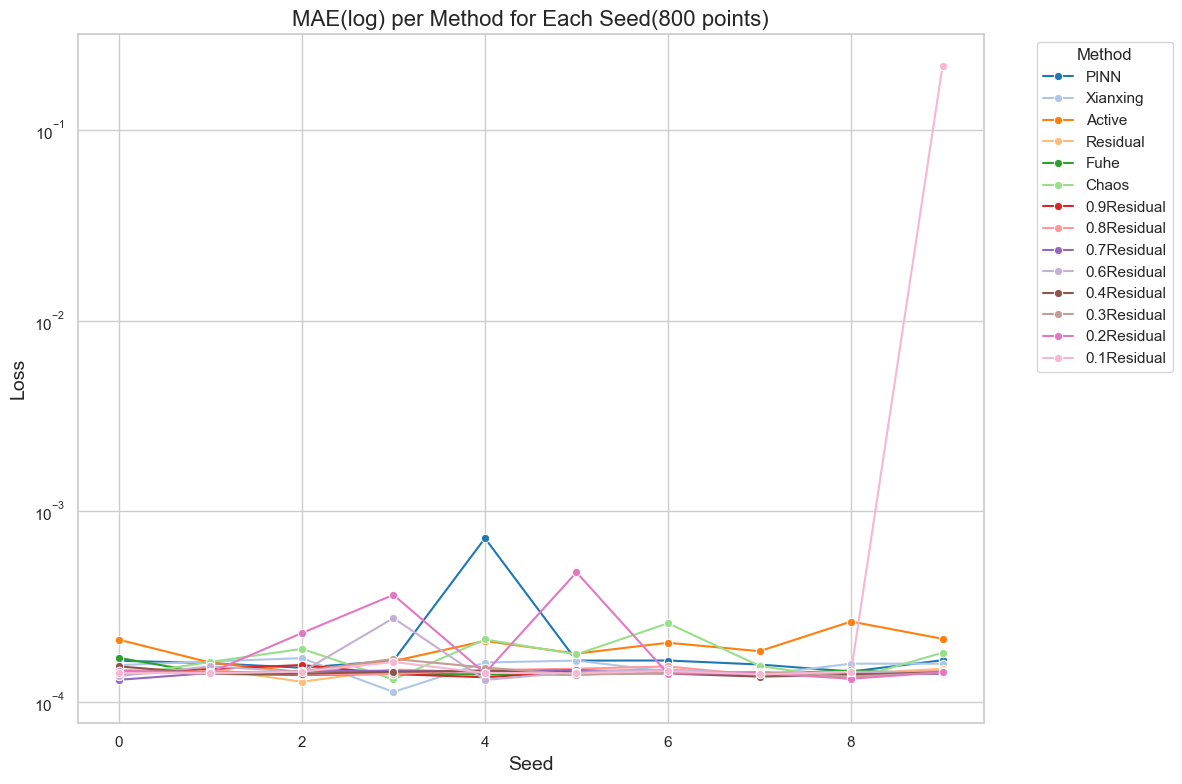

In [15]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)



# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

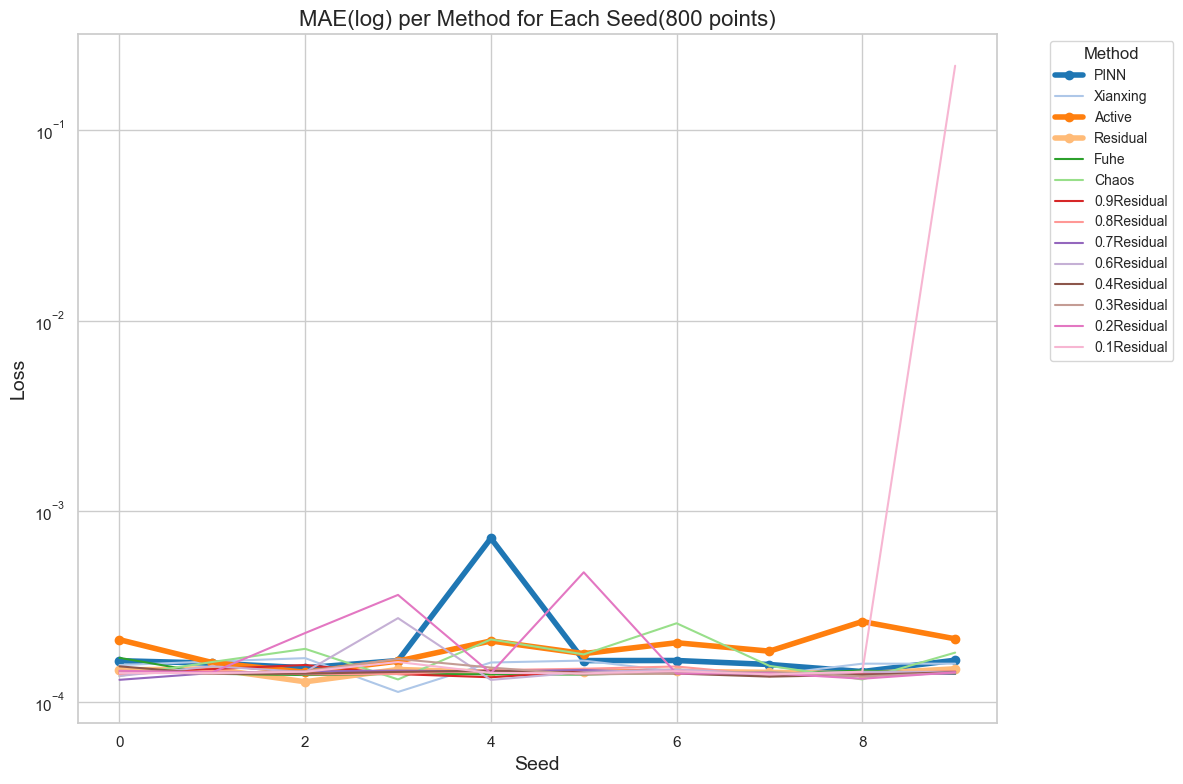

In [16]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_32596\2169414111.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_32596\2169414111.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


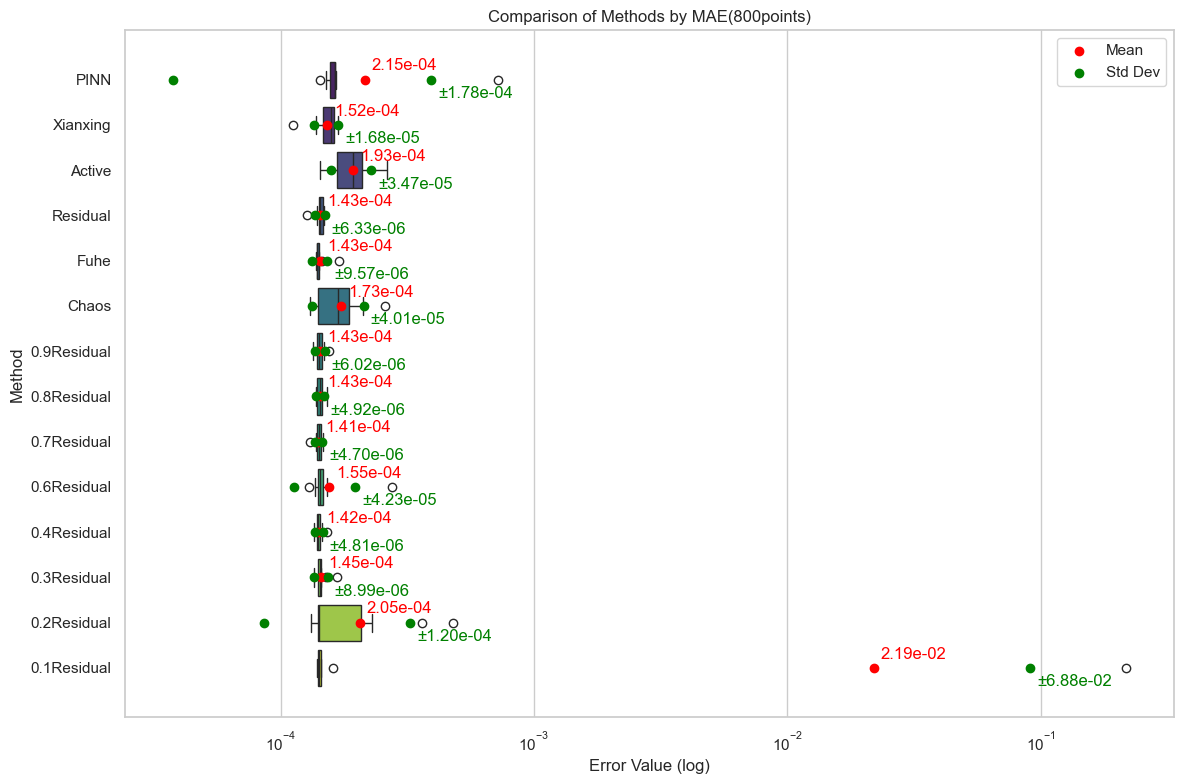

In [17]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.2e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.2e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_32596\2556958130.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_32596\2556958130.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


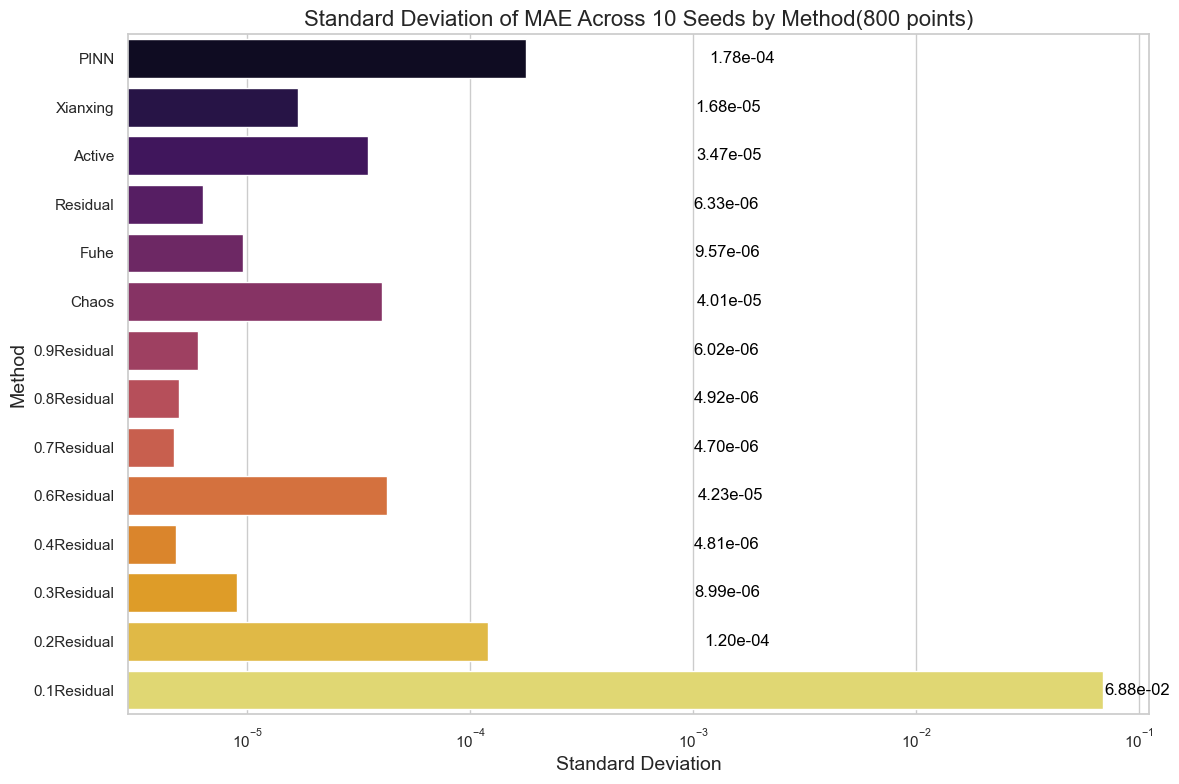

In [18]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of MAE Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

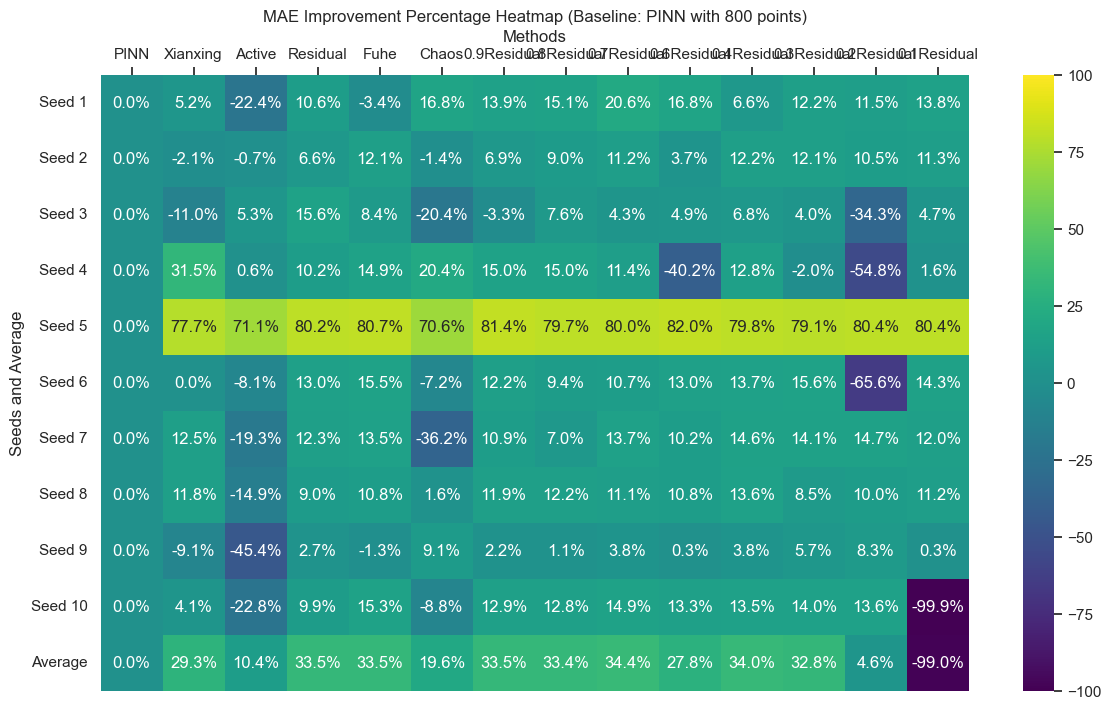

In [19]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



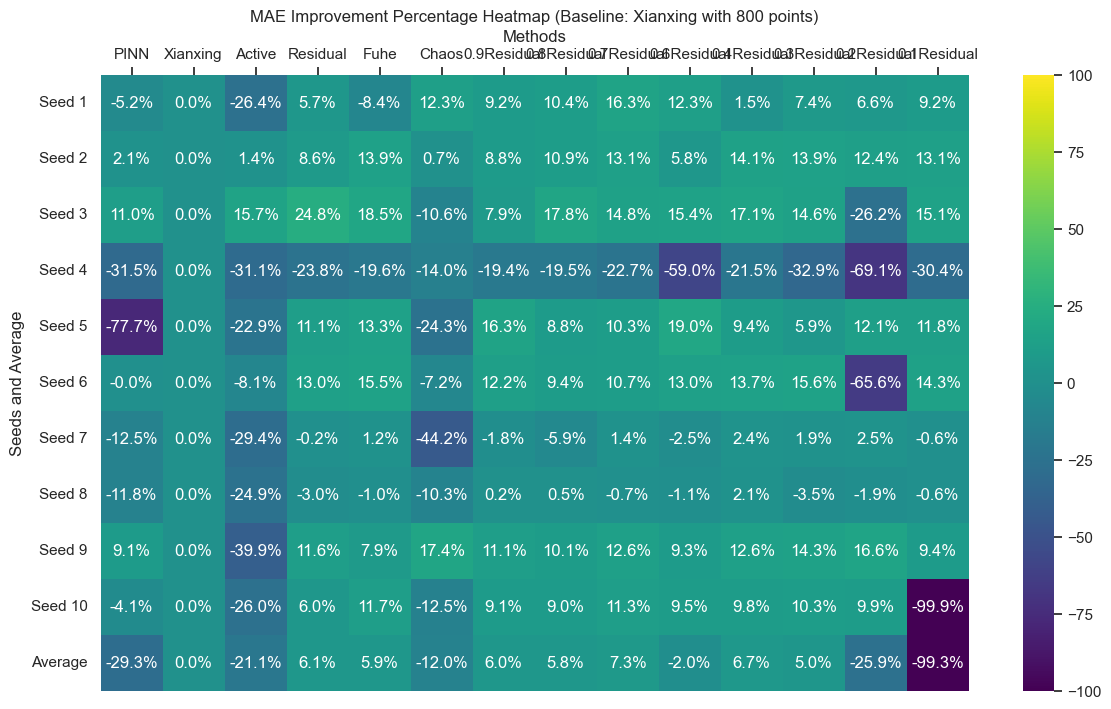

In [20]:
# 选择基准方法
baseline_method = 'Xianxing'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



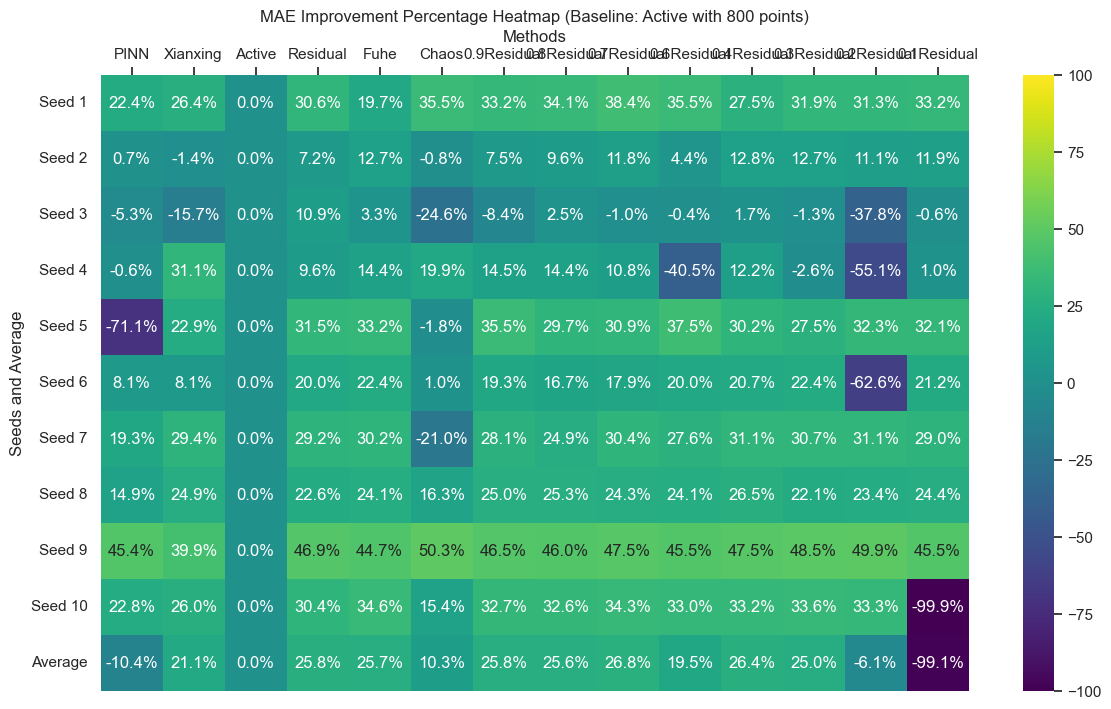

In [21]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



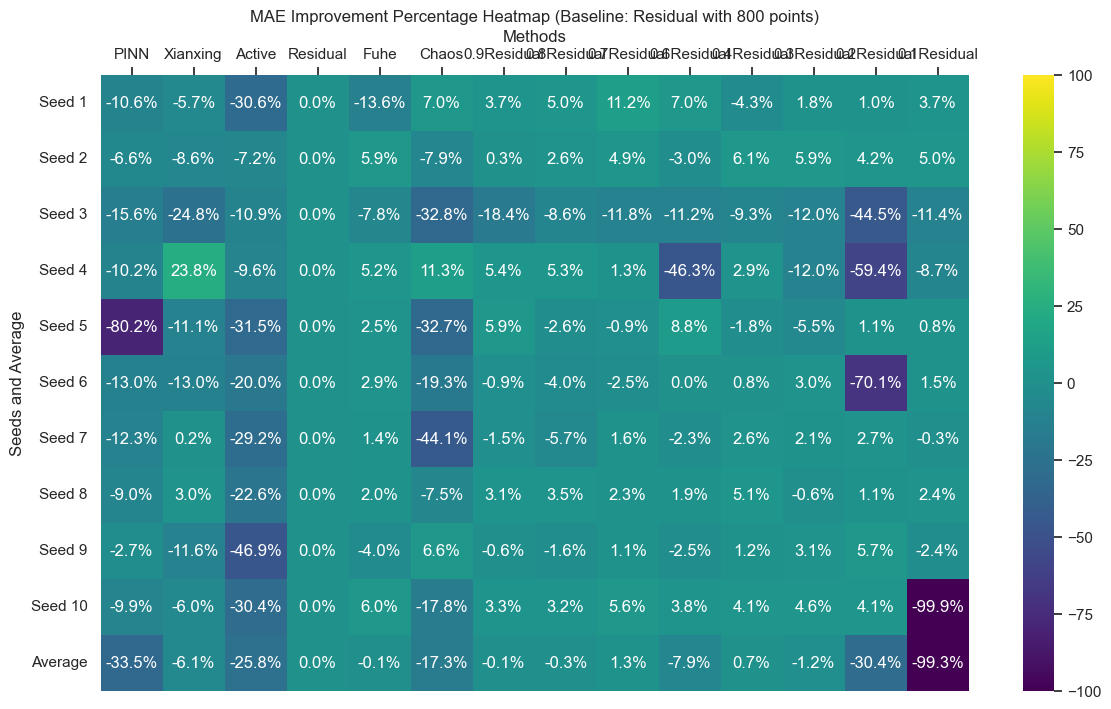

In [22]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



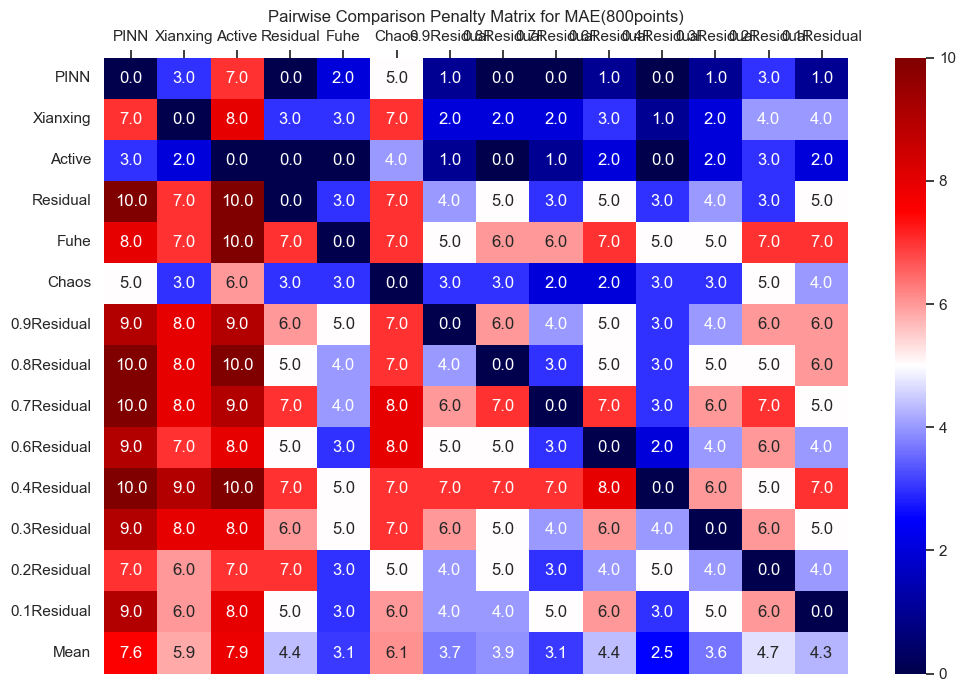

In [23]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MAE(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [24]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MSE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Xianxing', 'Active', 'Residual', 'Fuhe', 'Chaos', '0.9Residual', '0.8Residual', '0.7Residual', '0.6Residual', '0.4Residual', '0.3Residual', '0.2Residual', '0.1Residual']
Seeds: range(0, 10)
Loss Values: {'PINN': [5.4259837510531125e-08, 5.27324456669641e-08, 4.691583610257447e-08, 5.472507932524963e-08, 1.2905490326369088e-06, 5.4365116545731755e-08, 5.487377146231632e-08, 5.138499301105192e-08, 4.467702128486003e-08, 5.516772867976668e-08], 'Xianxing': [4.9108795726354864e-08, 5.4066809161524537e-08, 5.696169385836477e-08, 2.4949086645192194e-08, 5.290882894814274e-08, 5.475991485545602e-08, 4.3171718795248384e-08, 3.9984048655200166e-08, 5.185393943978126e-08, 5.0630850175090733e-08], 'Active': [8.223211980068802e-08, 5.301102165396955e-08, 4.425798367178048e-08, 5.331070845734451e-08, 7.899558964107687e-08, 6.202945420988179e-08, 7.760311425492723e-08, 6.500654750771102e-08, 1.268238431552237e-07, 8.315198817472114e-08], 'Residual': [4.7921945307583216e-08, 4.9303

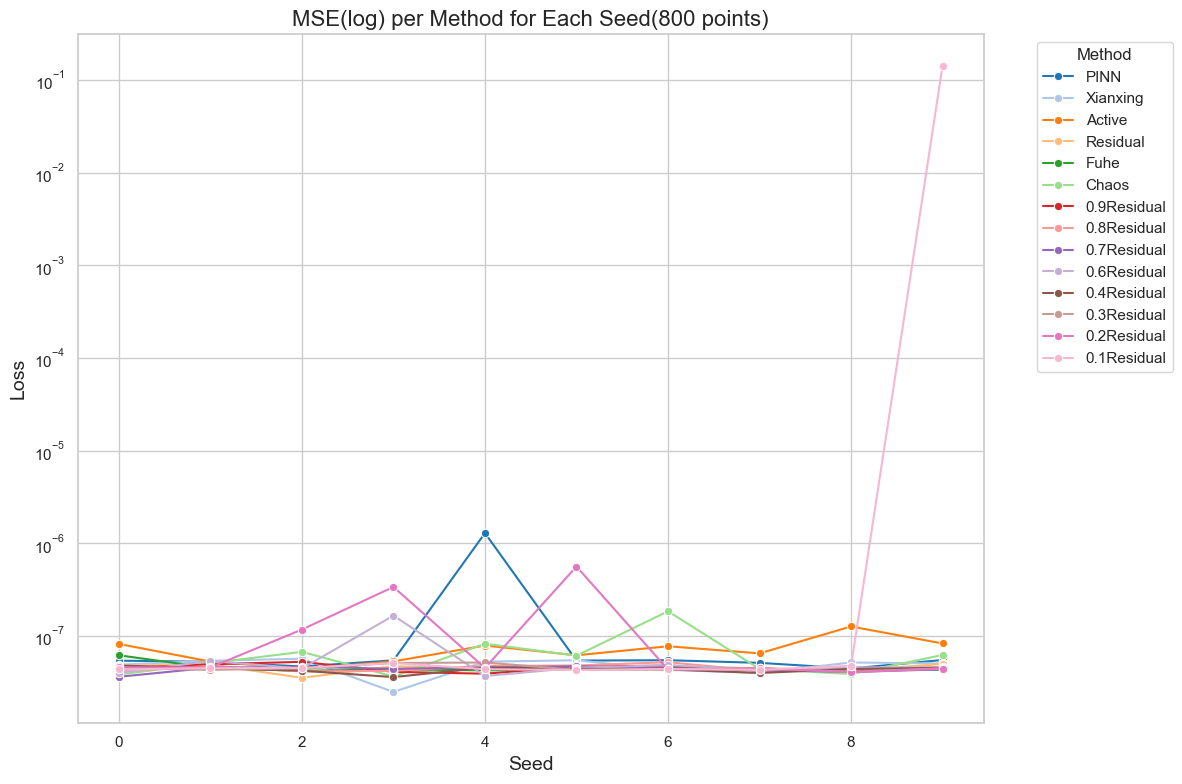

In [25]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')



# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

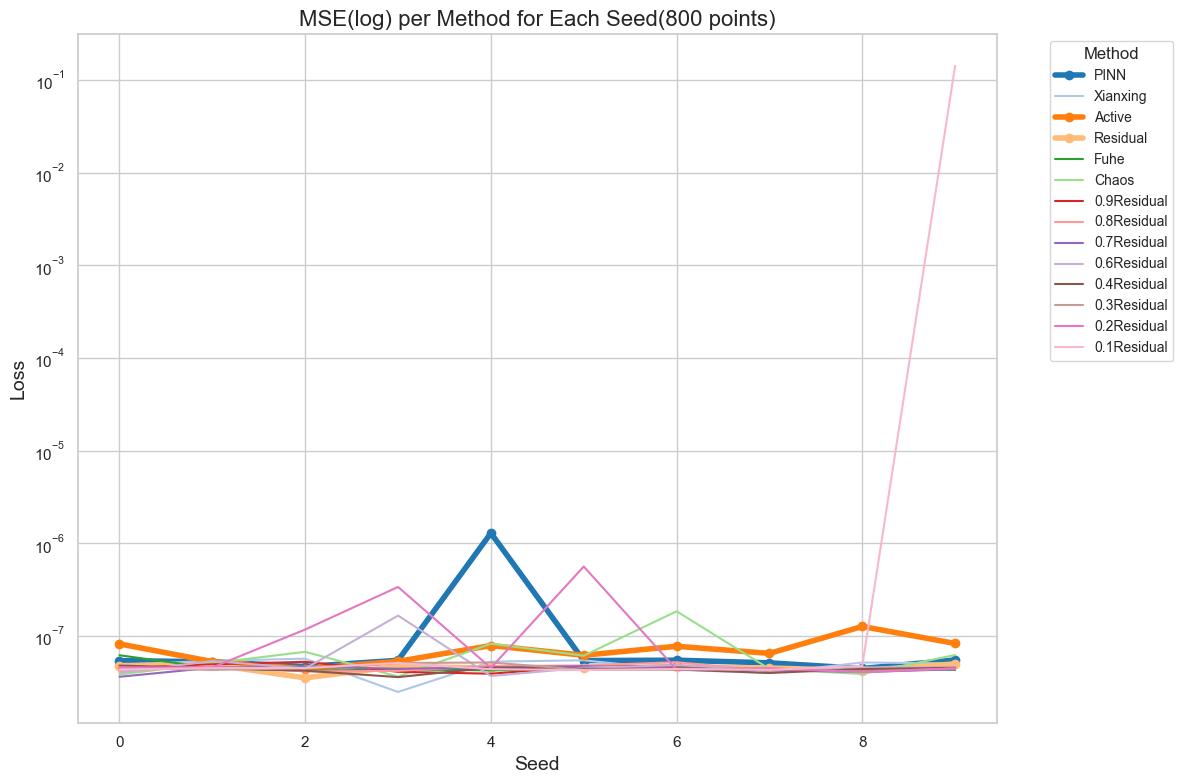

In [26]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_32596\763428643.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_32596\763428643.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


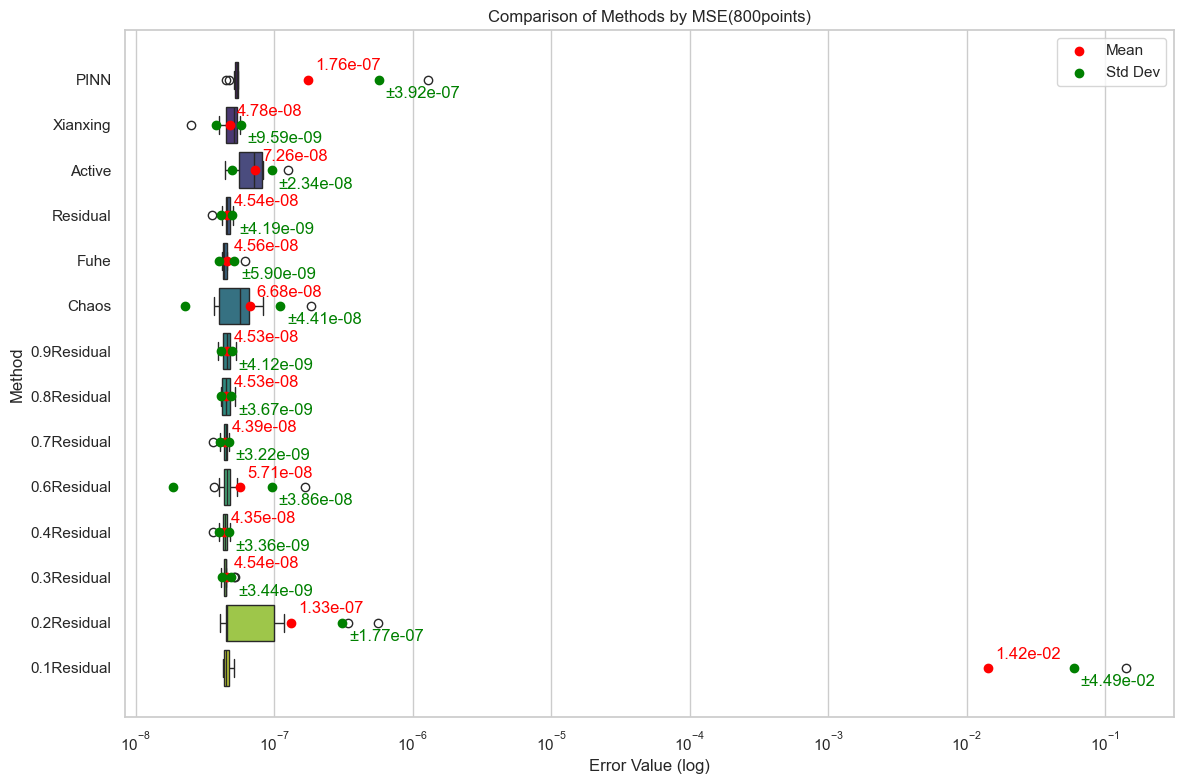

In [27]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.2e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.2e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

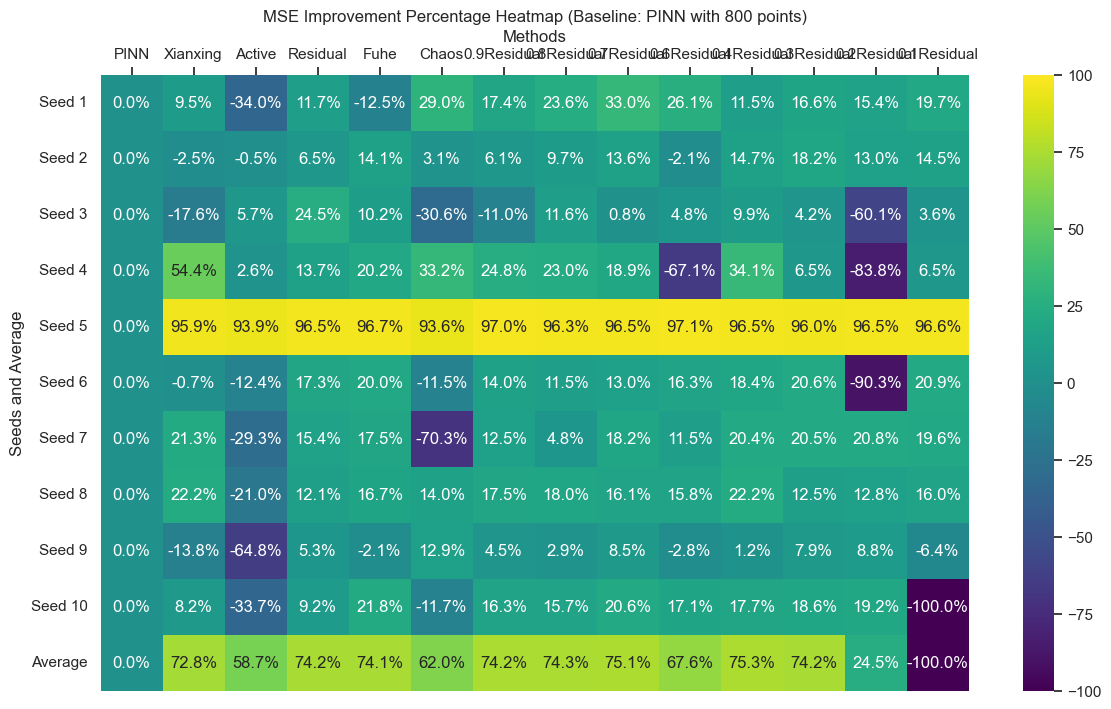

In [28]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



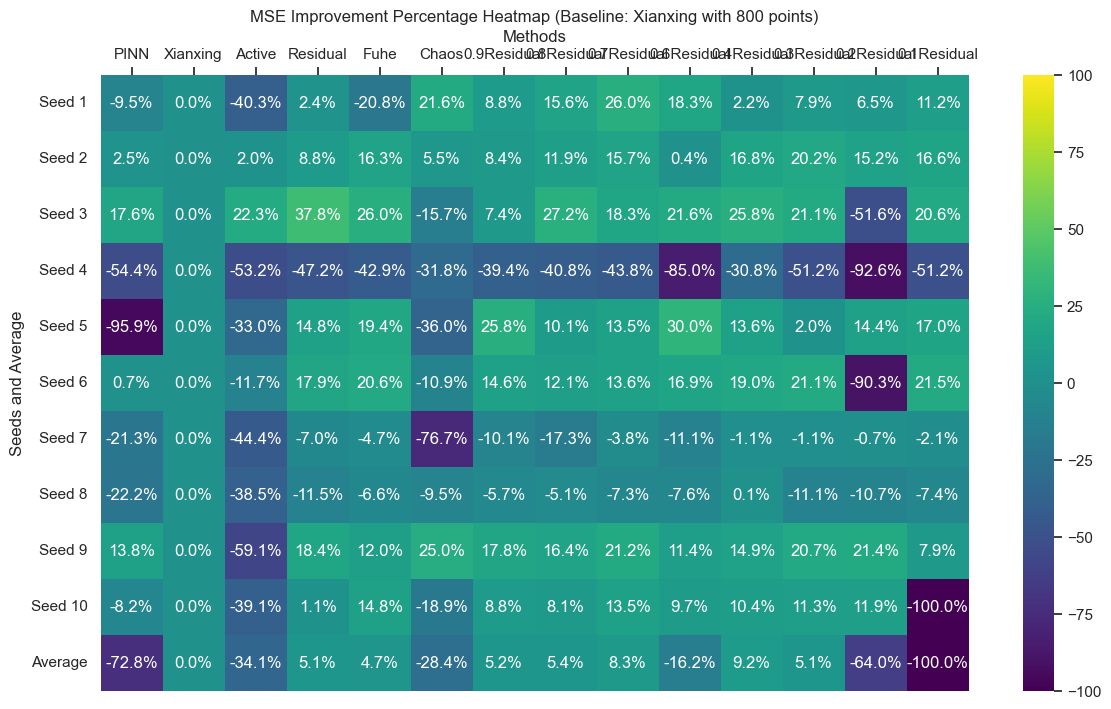

In [29]:
# 选择基准方法
baseline_method = 'Xianxing'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



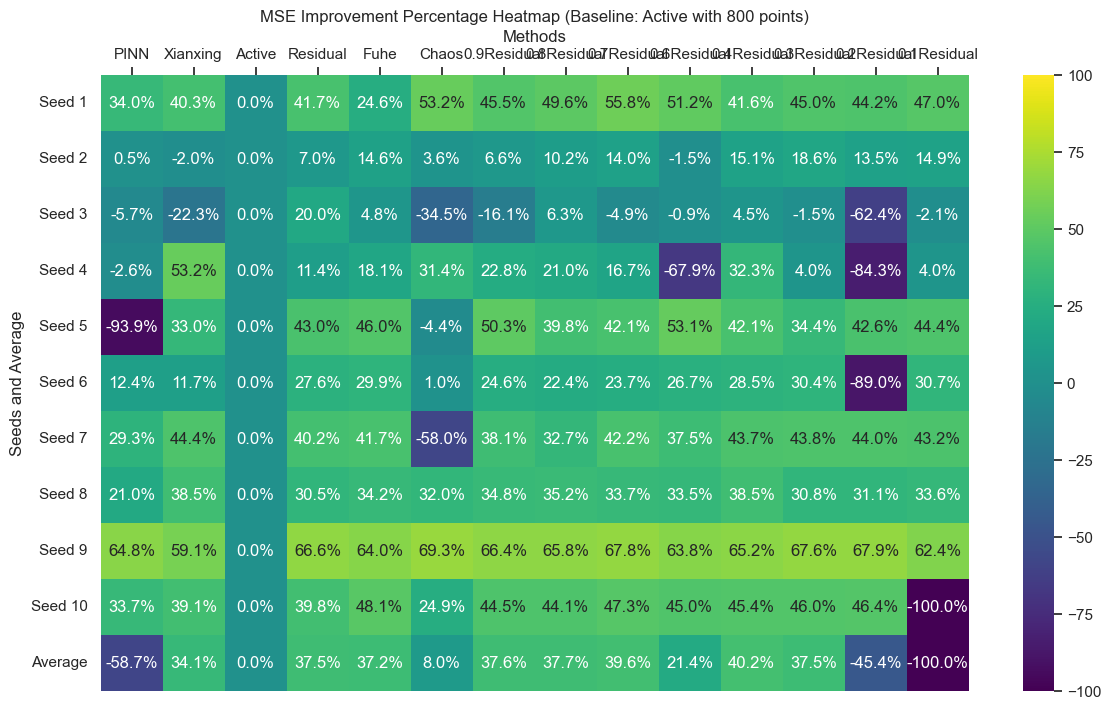

In [30]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



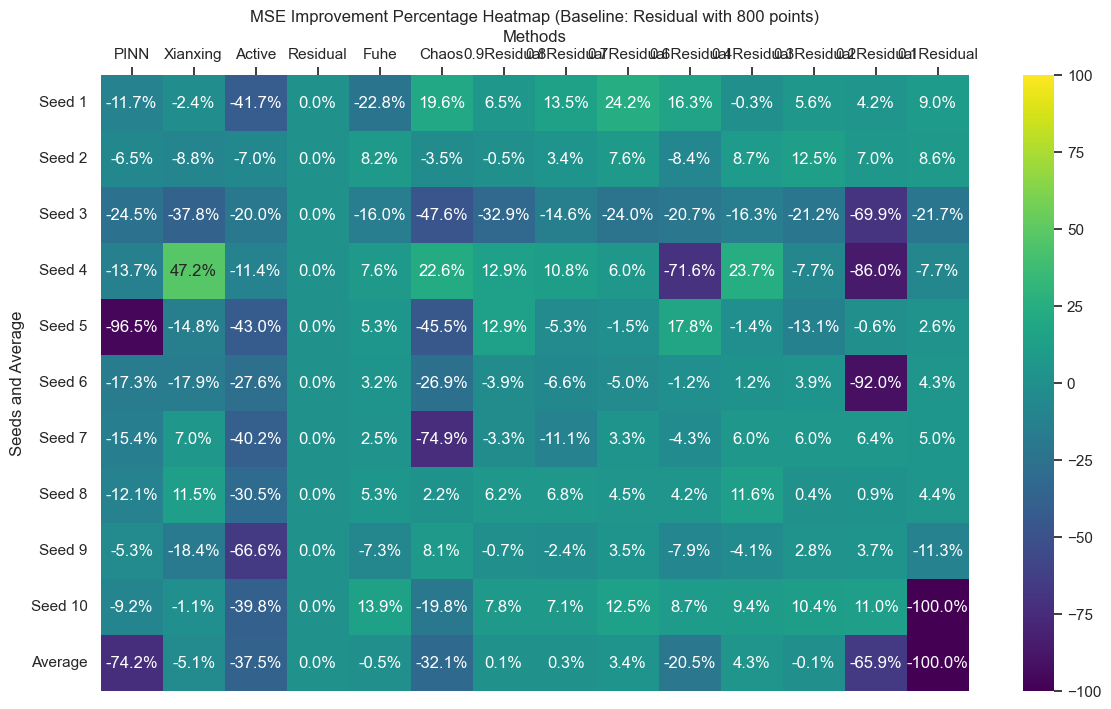

In [31]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



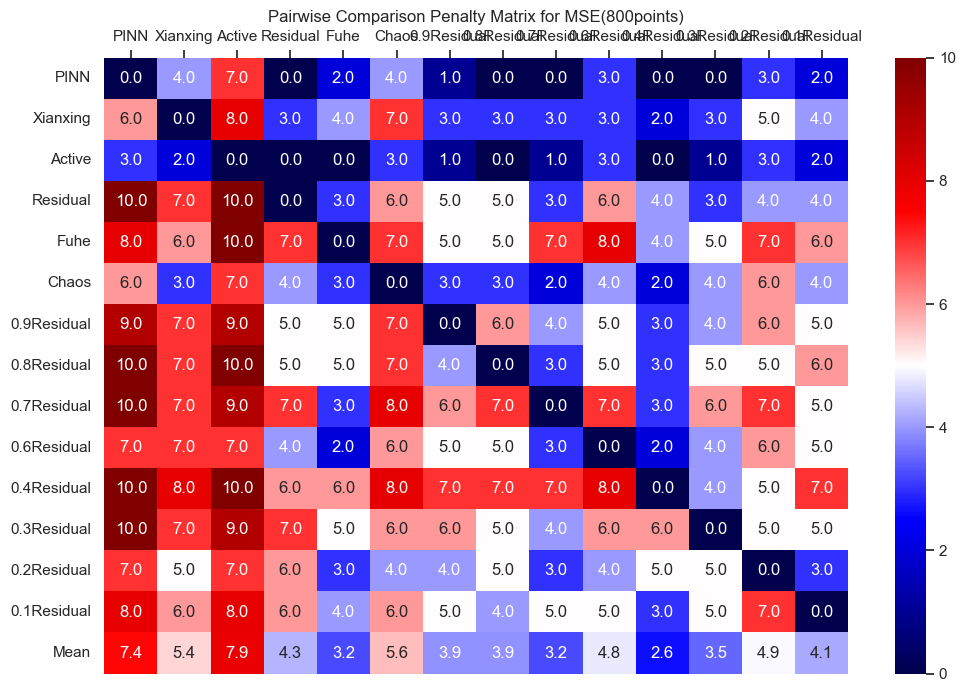

In [32]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MSE(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [4]:
# 对每个 (Method, Metric) 分组，剔除最大值和最小值，计算均值和标准差
def compute_trimmed_stats(df):
    stats = {
        'Method': [],
        'Metric': [],
        'Mean (trimmed)': [],
        'Std (trimmed)': []
    }

    grouped = df.groupby(['Method', 'Metric'])

    for (method, metric), group in grouped:
        values = group['Values'].values[0]  # 取出列表
        if len(values) > 2:
            trimmed_values = sorted(values)[1:-1]  # 剔除最大值和最小值
        else:
            trimmed_values = values  # 不足三项无法剔除
        
        mean_val = sum(trimmed_values) / len(trimmed_values)
        std_val = pd.Series(trimmed_values).std()

        stats['Method'].append(method)
        stats['Metric'].append(metric)
        stats['Mean (trimmed)'].append(mean_val)
        stats['Std (trimmed)'].append(std_val)

    return pd.DataFrame(stats)

# 生成剔除极值后的统计结果表
trimmed_stats_df = compute_trimmed_stats(df)

# 打印结果
print(trimmed_stats_df)


         Method    Metric  Mean (trimmed)  Std (trimmed)
0   0.1Residual     Chaos    9.774714e-04   1.426628e-03
1   0.1Residual   Error_u    4.657534e-04   1.367856e-05
2   0.1Residual       MAE    1.446806e-04   6.907147e-06
3   0.1Residual       MSE    4.549492e-08   2.698097e-09
4   0.1Residual  Residual    4.498440e-07   3.972486e-08
..          ...       ...             ...            ...
65     Xianxing     Chaos    2.787555e-04   4.451221e-04
66     Xianxing   Error_u    4.858710e-04   2.712403e-05
67     Xianxing       MAE    1.551120e-04   9.250228e-06
68     Xianxing       MSE    4.956061e-08   5.314220e-09
69     Xianxing  Residual    4.603708e-07   1.851889e-08

[70 rows x 4 columns]


C:\Users\cheny\AppData\Local\Temp\ipykernel_43524\3874139176.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


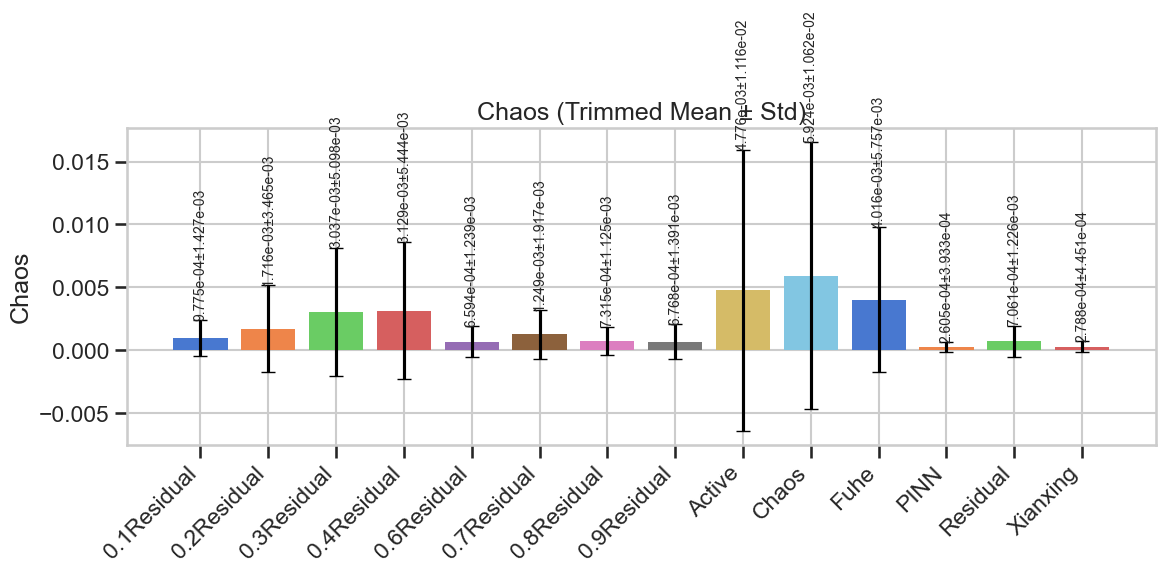

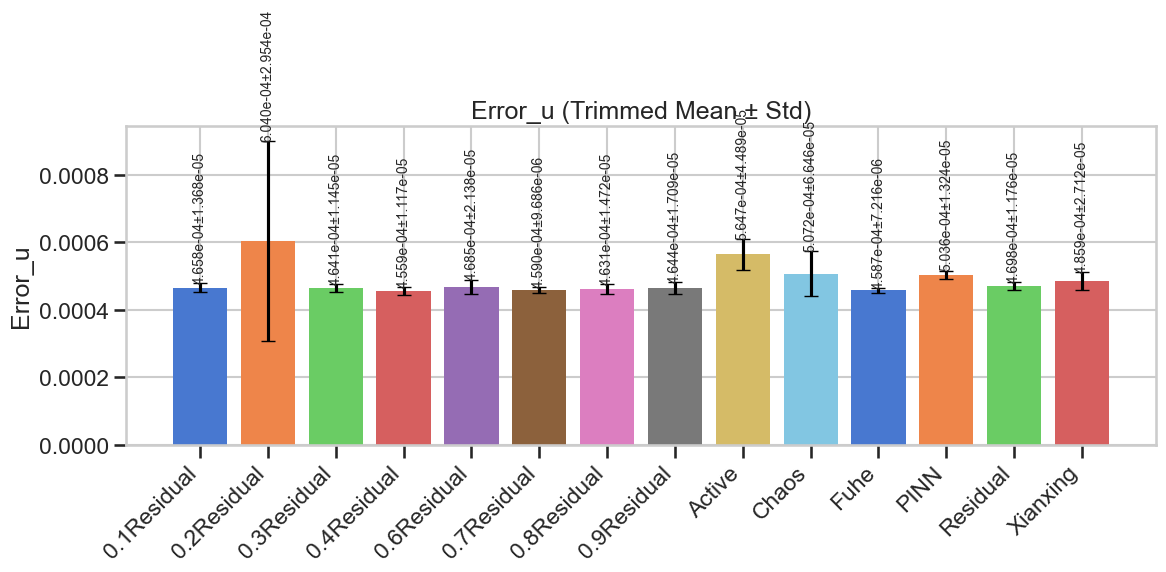

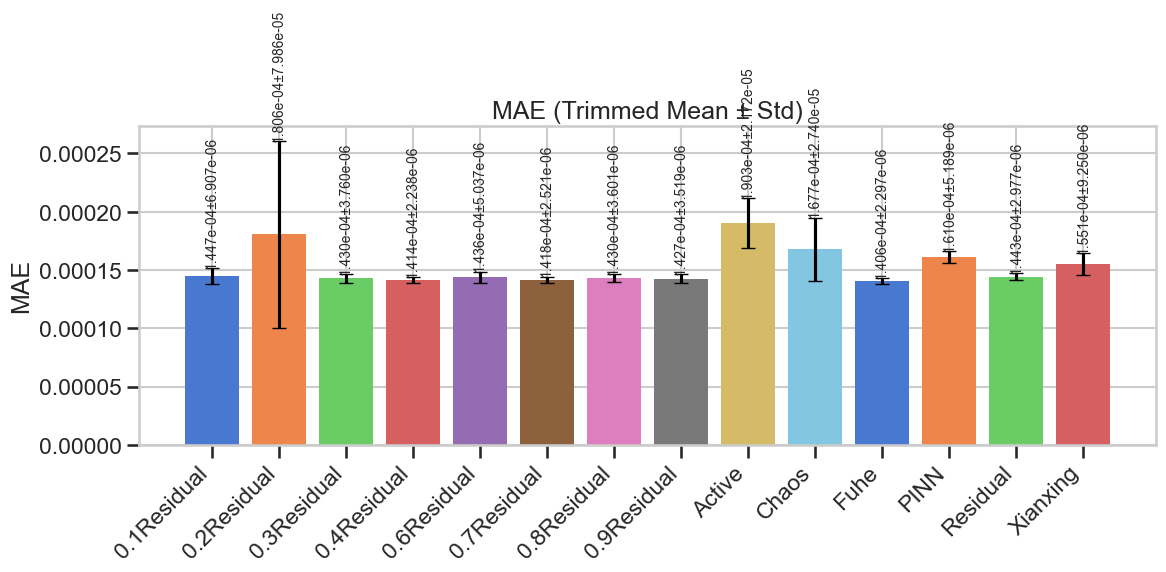

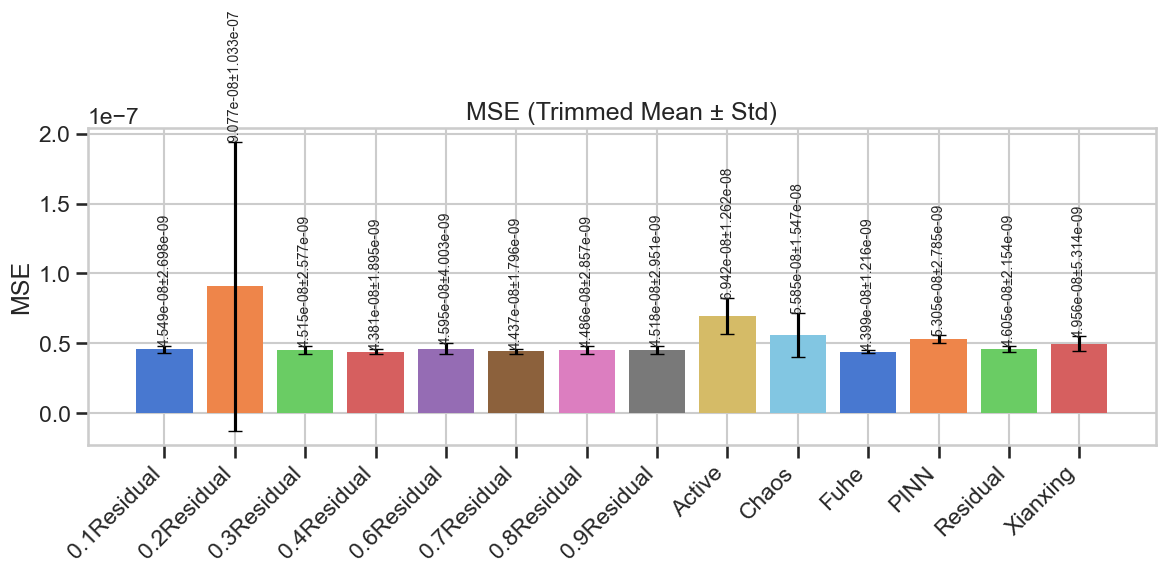

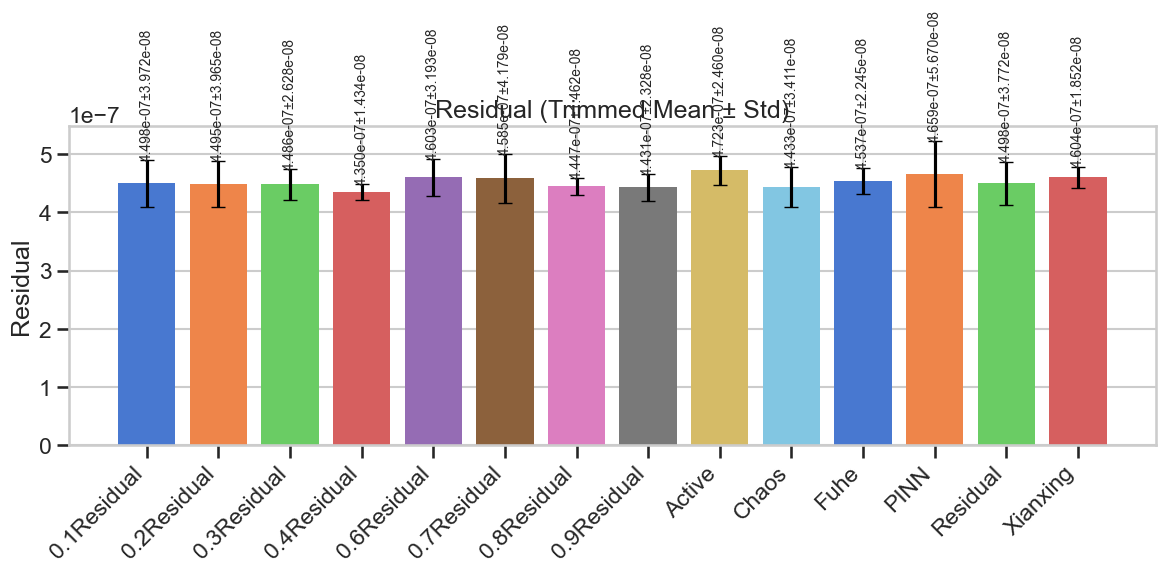

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置画图风格
plt.style.use("seaborn-whitegrid")
sns.set_context("talk")

# 遍历每个指标分别画图
metrics = trimmed_stats_df['Metric'].unique()

for metric in metrics:
    subset = trimmed_stats_df[trimmed_stats_df['Metric'] == metric]
    
    # 取数据
    methods = subset['Method'].values
    means = subset['Mean (trimmed)'].values
    stds = subset['Std (trimmed)'].values
    x = np.arange(len(methods))

    # 创建图和轴
    fig, ax = plt.subplots(figsize=(12, 6))

    # 画柱状图
    bars = ax.bar(x, means, yerr=stds, capsize=5, color=sns.color_palette("muted", len(methods)))

    # 添加数值标签
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + stds[i],  # 在误差条上方显示
            f'{means[i]:.3e}±{stds[i]:.3e}',  # 科学计数格式，比如 4.56e-04
            ha='center', va='bottom', fontsize=10, rotation=90
        )

    # 设置图表
    ax.set_xticks(x)
    ax.set_xticklabels(methods, rotation=45, ha='right')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} (Trimmed Mean ± Std)')
    plt.tight_layout()
    plt.show()
